In [1]:
import os
import zipfile
import torch
from PIL import Image
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy import stats
from PIL import Image

In [2]:
path = r"/kaggle/input/tumor-trace"
train_folder = os.path.join(path, 'train')
val_folder = os.path.join(path, 'val')
test_folder = os.path.join(path, 'test')
files_and_dirs = os.listdir(path)
print(f"Contents of the main directory: {files_and_dirs}")
if os.path.exists(train_folder):
    train_subdirs = os.listdir(train_folder)
    print(f"Subdirectories in the train folder: {train_subdirs}")
else:
    print(f"The folder {train_folder} does not exist. Please check the path.")
if os.path.exists(val_folder):
    val_subdirs = os.listdir(val_folder)
    print(f"Subdirectories in the val folder: {val_subdirs}")
else:
    print(f"The folder {val_folder} does not exist. Please check the path.")
if os.path.exists(test_folder):
    test_subdirs = os.listdir(test_folder)
    print(f"Subdirectories in the test folder: {test_subdirs}")
else:
    print(f"The folder {test_folder} does not exist. Please check the path.")

Contents of the main directory: ['val', 'test', 'train']
Subdirectories in the train folder: ['Benign', 'Malignant']
Subdirectories in the val folder: ['Benign', 'Malignant']
Subdirectories in the test folder: ['Benign', 'Malignant']


In [3]:
path = r"/kaggle/input/tumor-trace"
folder_count = 0
file_count = 0
for root, dirs, files in os.walk(path):
    folder_count += len(dirs)
    file_count += len(files)
print(f"Total Folders: {folder_count}")
print(f"Total Files: {file_count}")

Total Folders: 4185
Total Files: 29274


In [4]:
def count_images_in_class(directory):
    return sum([len(files) for r, d, files in os.walk(directory) if any(f.lower().endswith(('.jpg', '.jpeg', '.png')) for f in files)])

train_dir = r'/kaggle/input/tumor-trace/train'
val_dir = r'/kaggle/input/tumor-trace/val'
test_dir = r'/kaggle/input/tumor-trace/test'

benign_train_dir = os.path.join(train_dir, 'Benign')
malignant_train_dir = os.path.join(train_dir, 'Malignant')

benign_val_dir = os.path.join(val_dir, 'Benign')
malignant_val_dir = os.path.join(val_dir, 'Malignant')

benign_test_dir = os.path.join(test_dir, 'Benign')
malignant_test_dir = os.path.join(test_dir, 'Malignant')

print("Checking directories and contents:\n")

def check_directory(path, name):
    print(f"{name} Directory Exists: {os.path.exists(path)}")
    if os.path.exists(path):
        print(f"Contents of {name} Directory: {os.listdir(path)}")
    print()

check_directory(benign_train_dir, "Benign Train")
check_directory(malignant_train_dir, "Malignant Train")
check_directory(benign_val_dir, "Benign Val")
check_directory(malignant_val_dir, "Malignant Val")
check_directory(benign_test_dir, "Benign Test")
check_directory(malignant_test_dir, "Malignant Test")

benign_train_count = count_images_in_class(benign_train_dir)
malignant_train_count = count_images_in_class(malignant_train_dir)

benign_val_count = count_images_in_class(benign_val_dir)
malignant_val_count = count_images_in_class(malignant_val_dir)

benign_test_count = count_images_in_class(benign_test_dir)
malignant_test_count = count_images_in_class(malignant_test_dir)

print(f"Benign (Training): {benign_train_count} images")
print(f"Malignant (Training): {malignant_train_count} images")

print(f"Benign (Validation): {benign_val_count} images")
print(f"Malignant (Validation): {malignant_val_count} images")

print(f"Benign (Test): {benign_test_count} images")
print(f"Malignant (Test): {malignant_test_count} images")



Checking directories and contents:

Benign Train Directory Exists: True
Contents of Benign Train Directory: ['BreaDM-Be-1820', 'BreaDM-Be-2106', 'BreaDM-Be-1818', 'BreaDM-Be-2108', 'BreaDM-Be-1803', 'BreaDM-Be-1902', 'BreaDM-Be-1825', 'BreaDM-Be-2016', 'BreaDM-Be-1827', 'BreaDM-Be-2107', 'BreaDM-Be-2103', 'BreaDM-Be-2007', 'BreaDM-Be-2010', 'BreaDM-Be-2015', 'BreaDM-Be-1809', 'BreaDM-Be-1908', 'BreaDM-Be-1903', 'BreaDM-Be-1812', 'BreaDM-Be-1829', 'BreaDM-Be-2006', 'BreaDM-Be-1828', 'BreaDM-Be-2012', 'BreaDM-Be-1811', 'BreaDM-Be-1913', 'BreaDM-Be-1806', 'BreaDM-Be-1830', 'BreaDM-Be-2101', 'BreaDM-Be-1808', 'BreaDM-Be-1831', 'BreaDM-Be-1910', 'BreaDM-Be-1801', 'BreaDM-Be-2004', 'BreaDM-Be-1819', 'BreaDM-Be-1805', 'BreaDM-Be-2003', 'BreaDM-Be-2009', 'BreaDM-Be-1816', 'BreaDM-Be-2011', 'BreaDM-Be-1817', 'BreaDM-Be-1804', 'BreaDM-Be-2021', 'BreaDM-Be-1807', 'BreaDM-Be-1823', 'BreaDM-Be-1912', 'BreaDM-Be-1904', 'BreaDM-Be-2018', 'BreaDM-Be-2008', 'BreaDM-Be-2023', 'BreaDM-Be-1821', 'BreaDM-B

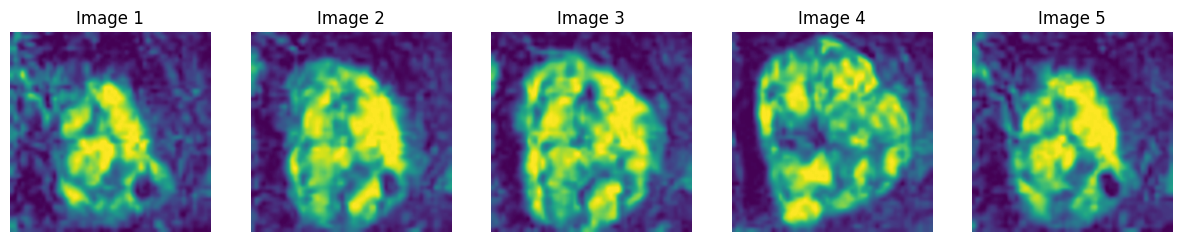

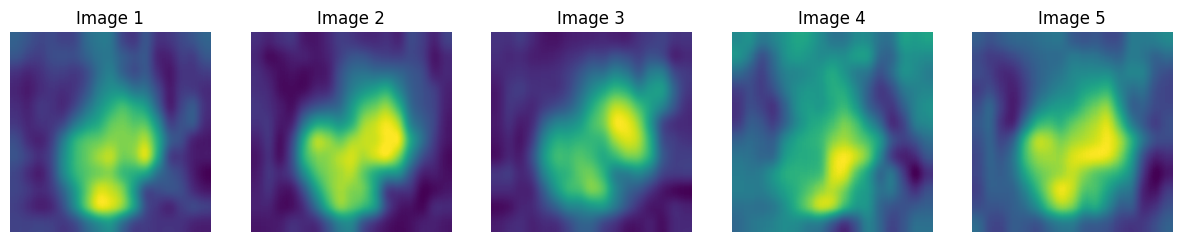

In [5]:
def find_images_in_directory(directory):
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):  
                image_paths.append(os.path.join(root, file))
    return image_paths

def resize_images(image_paths, output_dir, new_size=(224, 224)):
    resized_images = []  
    os.makedirs(output_dir, exist_ok=True)  

    for image_path in image_paths:
        try:
            with Image.open(image_path) as img:
                resized_img = img.resize(new_size)
                
                relative_path = os.path.relpath(image_path, os.path.commonpath(image_paths))
                output_path = os.path.join(output_dir, relative_path)
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                resized_img.save(output_path)
                
                resized_images.append(resized_img)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    
    return resized_images

def display_images(images):
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis
        plt.title(f'Image {i + 1}')
    plt.show()

def process_images_in_directory(directory, output_dir, new_size=(224, 224)):
    image_files = find_images_in_directory(directory)
    if image_files:
        resized_images = resize_images(image_files, output_dir, new_size)
        display_images(resized_images[:5])  
    else:
        print(f"No images found in the directory: {directory}")

train_folder = r'/kaggle/input/tumor-trace/train'
val_folder = r'/kaggle/input/tumor-trace/val'

output_train_folder = r'/kaggle/output/resized_images/train'
output_val_folder = r'/kaggle/output/resized_images/val'

process_images_in_directory(train_folder, output_train_folder)
process_images_in_directory(val_folder, output_val_folder)


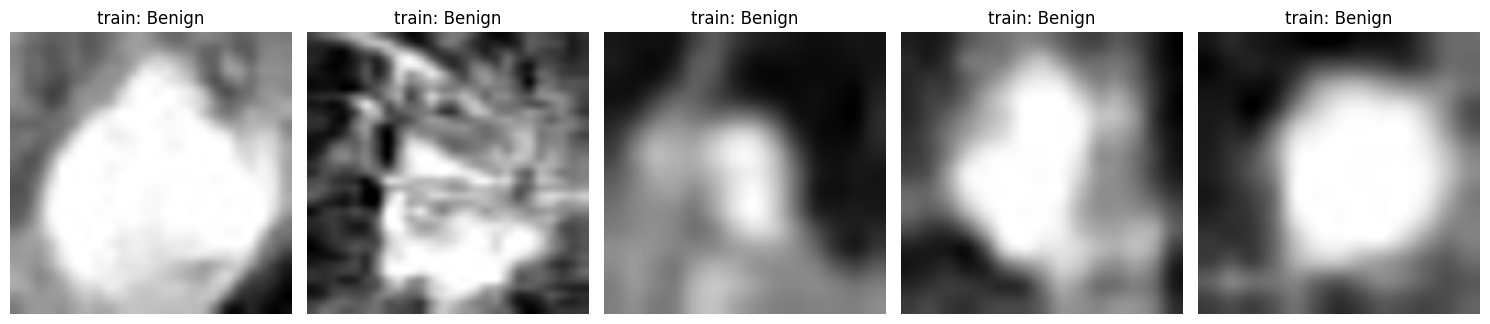

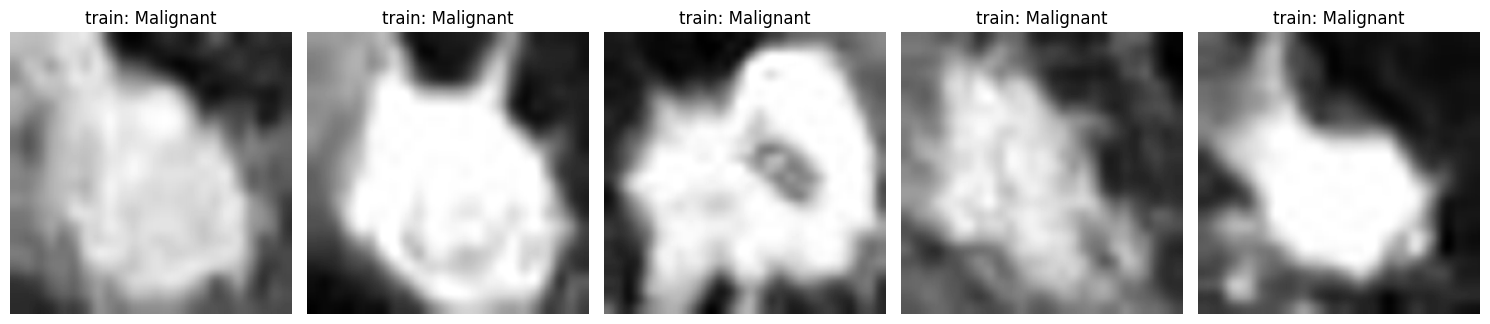

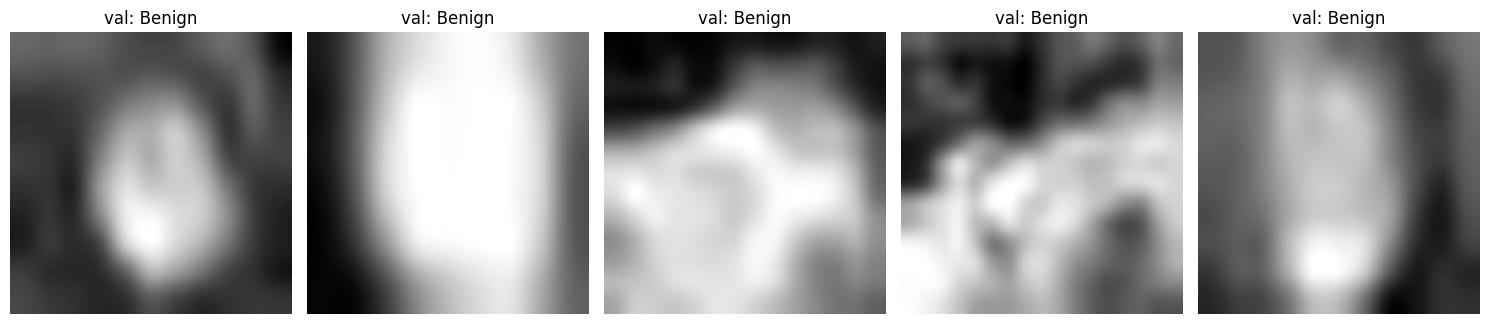

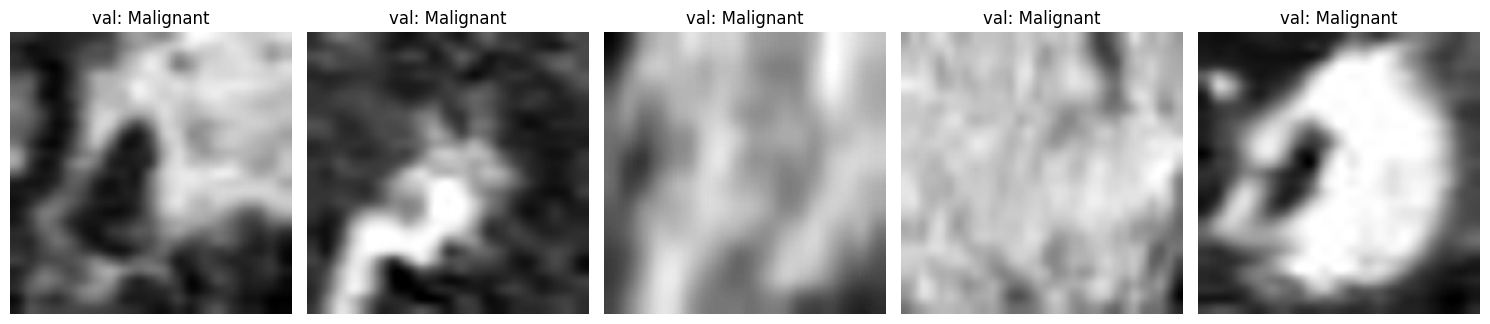

In [6]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def find_images_in_directory(directory):
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                image_path = os.path.join(root, file)
                image_paths.append(image_path)
    return image_paths

def display_images_with_labels(images, labels):
    plt.figure(figsize=(15, 5))
    for i, (img, label) in enumerate(zip(images, labels)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')  
        plt.axis('off')
        plt.title(label)
    plt.tight_layout()
    plt.show()

def display_random_images(directory, class_name, dataset_type, num_images=5, display_size=(224, 224)):
    image_paths = find_images_in_directory(directory)
    
    if image_paths:
        selected_images = random.sample(image_paths, min(num_images, len(image_paths))) 
        resized_images = [
            Image.open(img_path).convert('L').resize(display_size)  
            for img_path in selected_images
        ]
        
        labels = [f'{dataset_type}: {class_name}' for _ in resized_images]  
        display_images_with_labels(resized_images, labels)  
    else:
        print(f"No images found in the directory: {directory}")

train_benign_folder = r'/kaggle/input/tumor-trace/train/Benign'
train_malignant_folder = r'/kaggle/input/tumor-trace/train/Malignant'
val_benign_folder = r'/kaggle/input/tumor-trace/val/Benign'
val_malignant_folder = r'/kaggle/input/tumor-trace/val/Malignant'

display_random_images(train_benign_folder, 'Benign', 'train', num_images=5, display_size=(224, 224))
display_random_images(train_malignant_folder, 'Malignant', 'train', num_images=5, display_size=(224, 224))

display_random_images(val_benign_folder, 'Benign', 'val', num_images=5, display_size=(224, 224))
display_random_images(val_malignant_folder, 'Malignant', 'val', num_images=5, display_size=(224, 224))



Applying Horizontal Flip augmentation:


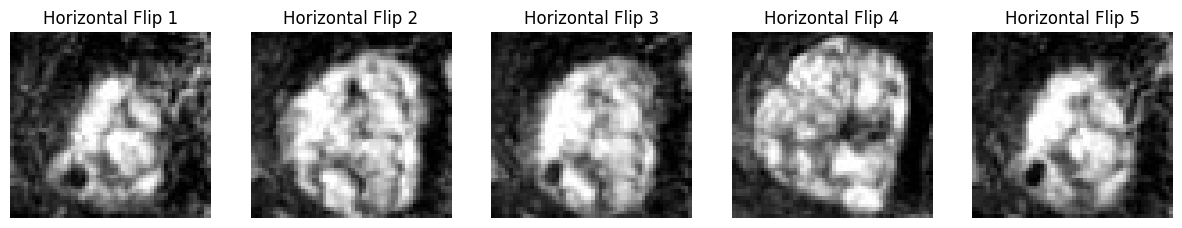


Applying Vertical Flip augmentation:


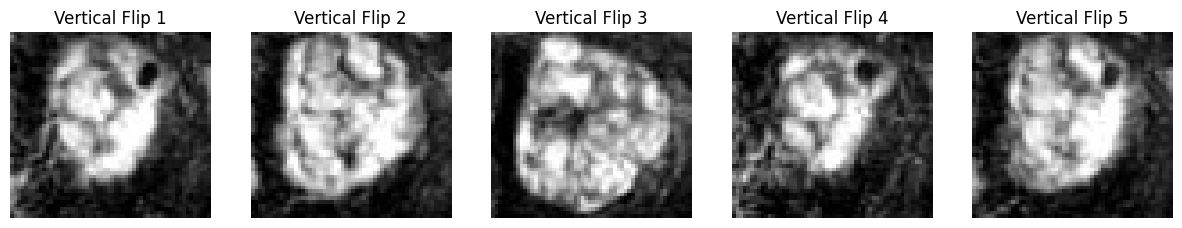


Applying Rotation augmentation:


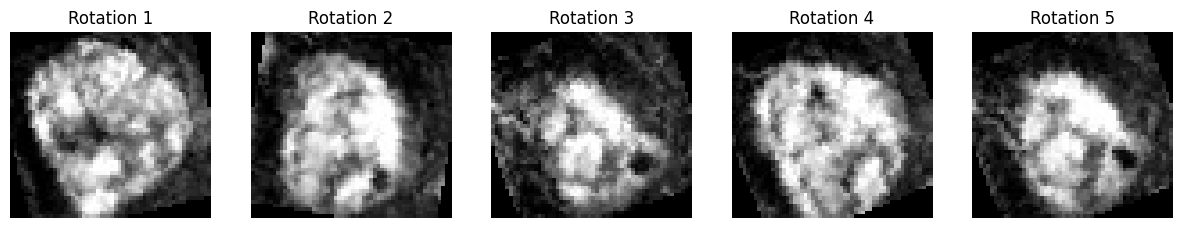


Applying Shear augmentation:


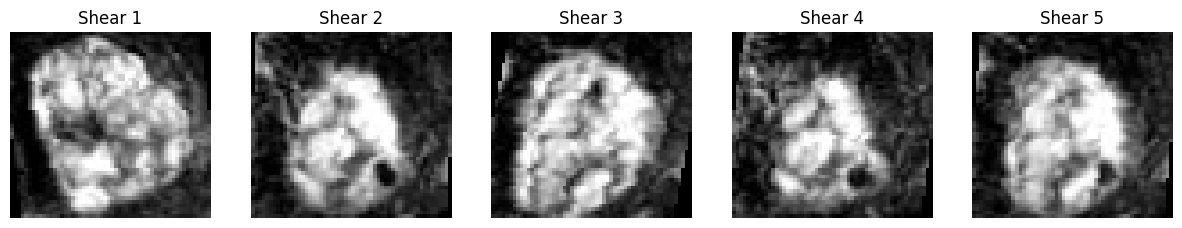


Applying Color Jitter augmentation:


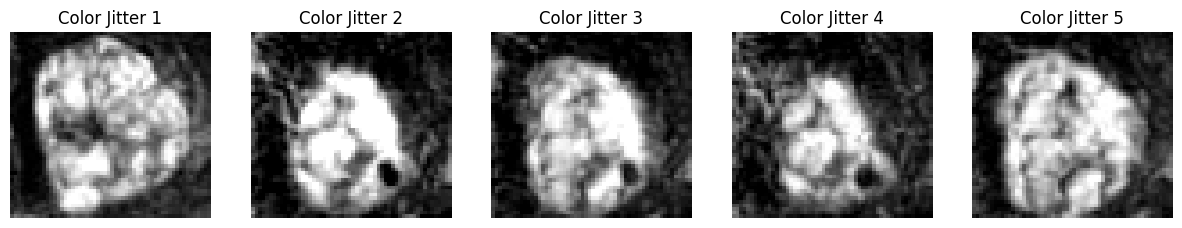


Applying Horizontal Flip augmentation:


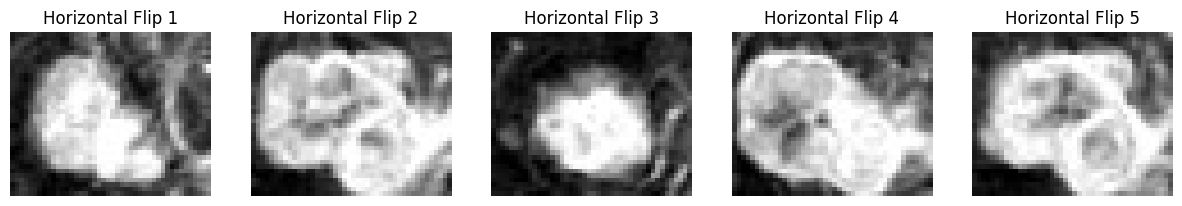


Applying Vertical Flip augmentation:


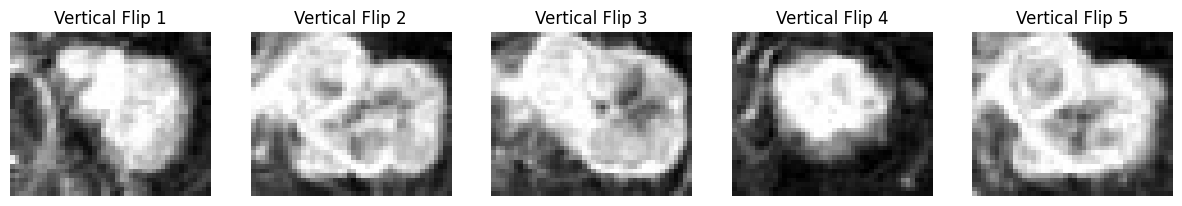


Applying Rotation augmentation:


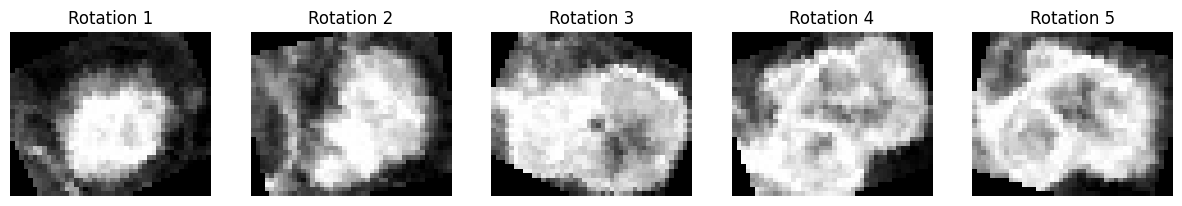


Applying Shear augmentation:


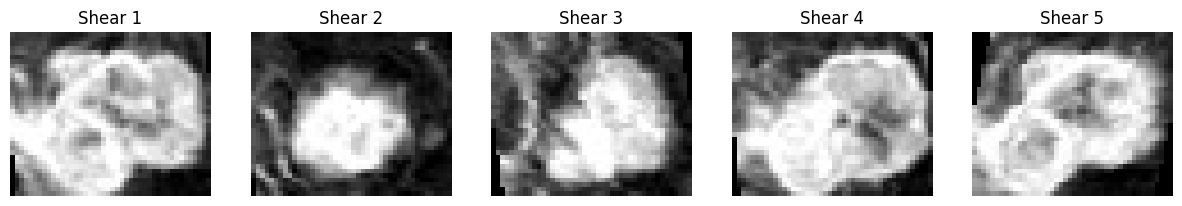


Applying Color Jitter augmentation:


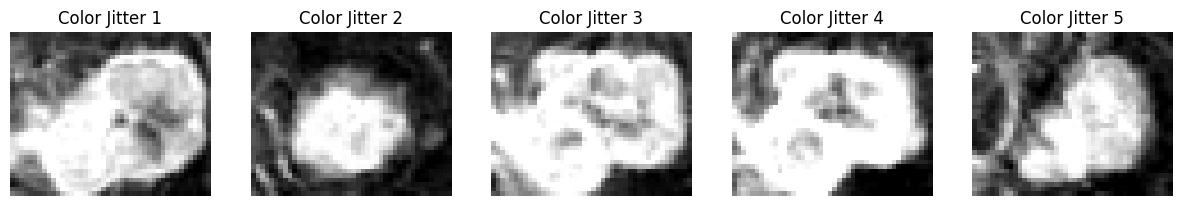


Applying Horizontal Flip augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Vertical Flip augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Rotation augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Shear augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Color Jitter augmentation:


<Figure size 1500x500 with 0 Axes>


Applying Horizontal Flip augmentation:


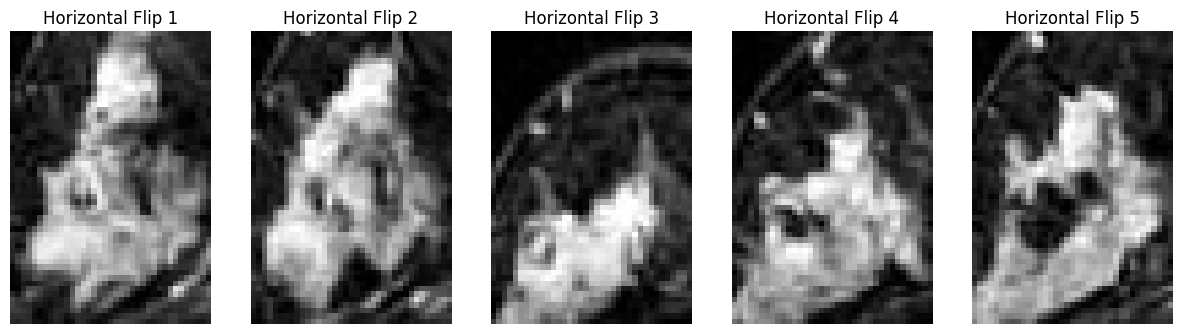


Applying Vertical Flip augmentation:


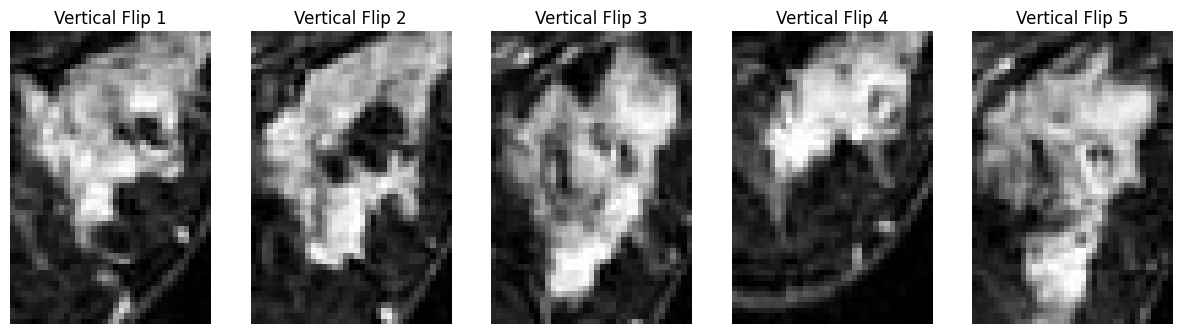


Applying Rotation augmentation:


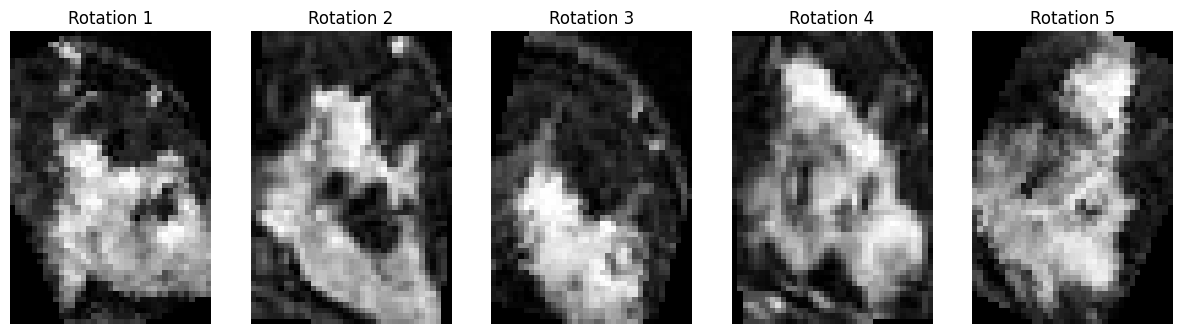


Applying Shear augmentation:


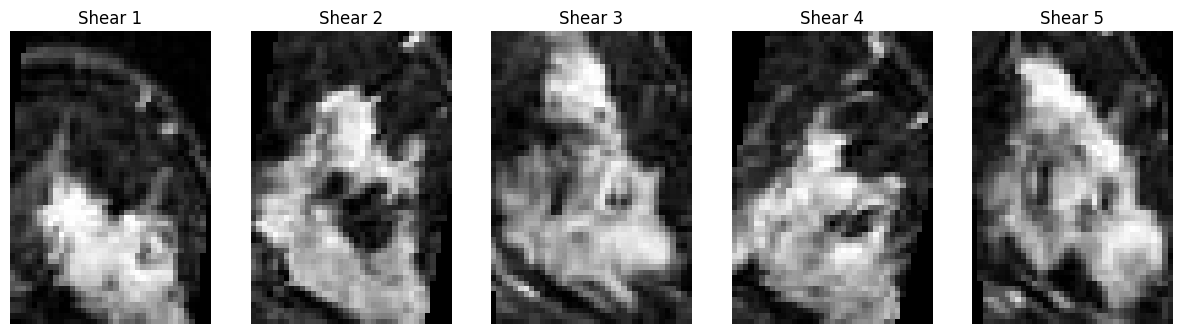


Applying Color Jitter augmentation:


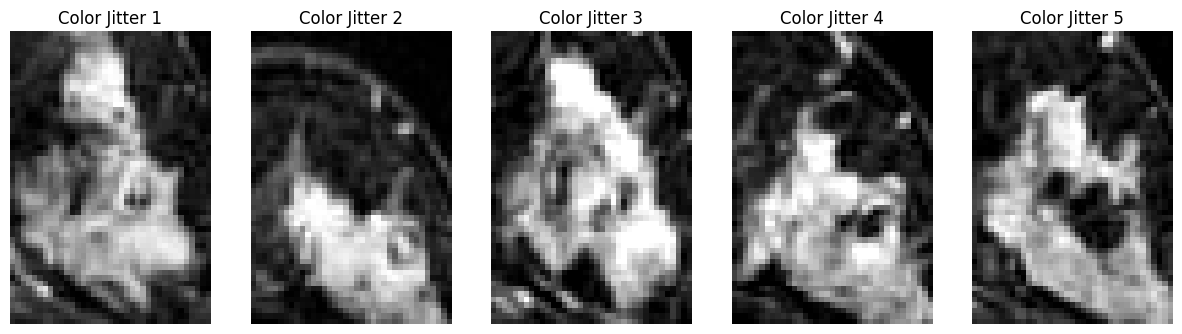

In [7]:
def augment_images_in_directory(directory):
    
    augmentations = {
        "Horizontal Flip": transforms.RandomHorizontalFlip(p=1),
        "Vertical Flip": transforms.RandomVerticalFlip(p=1),
        "Rotation": transforms.RandomRotation(30),
        "Shear": transforms.RandomAffine(degrees=0, shear=15),
        "Color Jitter": transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    }

   
    normalization = transforms.Normalize(mean=[0.5], std=[0.5])  

    images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                images.append(Image.open(image_path).convert('L'))  
                if len(images) >= 5:  
                    break
        if len(images) >= 5:
            break

    for name, augmentation in augmentations.items():
        augmented_images = []
        print(f"\nApplying {name} augmentation:")
        for img in images:
            augmented_img = augmentation(img)
            augmented_img = transforms.ToTensor()(augmented_img) 
            augmented_img = normalization(augmented_img) 
            augmented_images.append(augmented_img)

        display_images(random.sample(augmented_images, min(5, len(augmented_images))), name)

def display_images(images, title):
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        img = img.squeeze(0).numpy()  
        img = (img * 0.5) + 0.5  
        img = img.clip(0, 1) 
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')  
        plt.axis('off')
        plt.title(f'{title} {i + 1}')
    plt.show()

train_benign_folder = r'/kaggle/input/tumor-trace/train/Benign'
train_malignant_folder = r'/kaggle/input/tumor-trace/train/Malignant'

augment_images_in_directory(train_benign_folder)
augment_images_in_directory(train_malignant_folder)

val_benign_folder = r'/kaggle/input/tumor-trace/val/benign'
val_malignant_folder = r'/kaggle/input/tumor-trace/val/Malignant/'

augment_images_in_directory(val_benign_folder)
augment_images_in_directory(val_malignant_folder)

In [8]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),  
])

root_dir = r'/kaggle/input/tumor-trace'

train_dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(root_dir, 'val'), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(root_dir, 'test'), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

for images, labels in train_loader:
    print(images.shape, labels.shape)  
    break  


torch.Size([32, 3, 224, 224]) torch.Size([32])


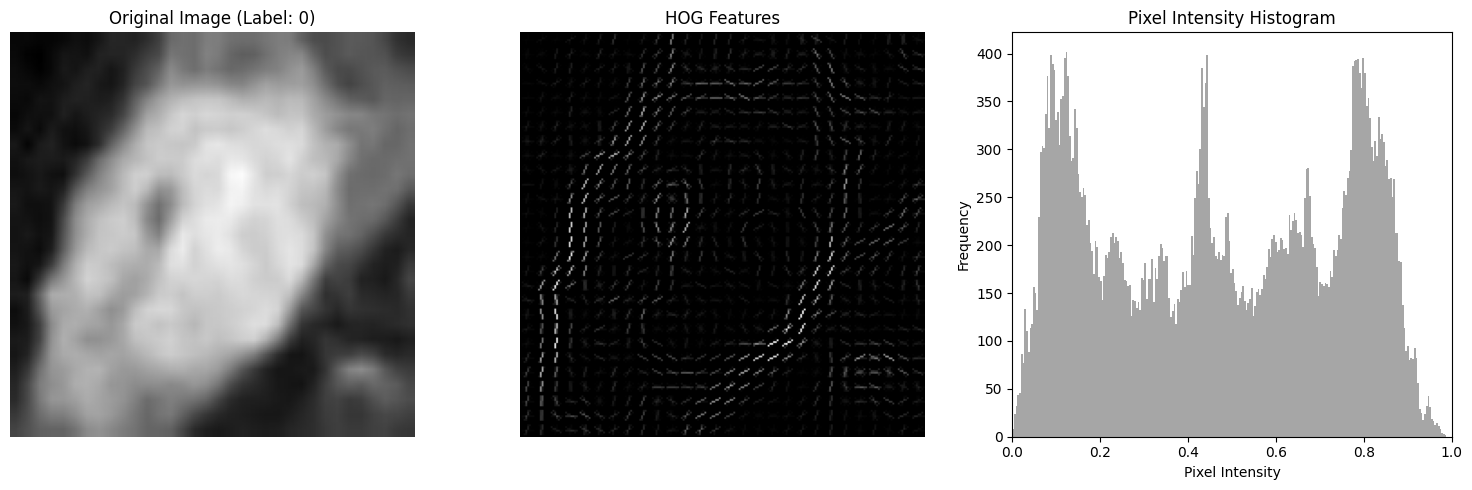

High pixel values: [0.8039215 0.8039215 0.8039215 ... 0.8039215 0.8039215 0.8039215]
Number of high pixel values: 7491


In [9]:
root_dir = r'/kaggle/input/tumor-trace'

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
])
dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

random_index = random.randint(0, len(dataset) - 1)
random_image, label = dataset[random_index]

image_np = random_image.numpy()  
image_np = np.transpose(image_np, (1, 2, 0))  

image_gray = np.mean(image_np, axis=2)  

hog_features, hog_image = feature.hog(image_gray, visualize=True, block_norm='L2-Hys')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.axis('off')
plt.title(f'Original Image (Label: {label})')

plt.subplot(1, 3, 2)
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.title('HOG Features')

plt.subplot(1, 3, 3)
plt.hist(image_gray.ravel(), bins=256, range=[0, 1], color='gray', alpha=0.7)
plt.title('Pixel Intensity Histogram')
plt.xlim([0, 1])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

high_pixel_indices = np.where(image_gray > 0.8)  
high_pixel_values = image_gray[high_pixel_indices]

print(f"High pixel values: {high_pixel_values}")
print(f"Number of high pixel values: {len(high_pixel_values)}")

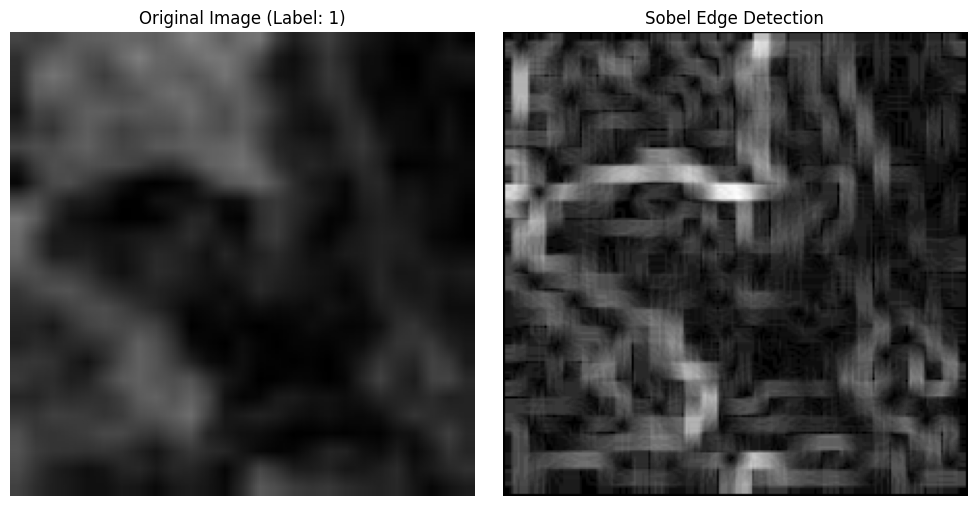

In [10]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

def convolve(image, kernel):
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros_like(image)
    
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i - 1:i + 2, j - 1:j + 2]
            output[i, j] = np.sum(region * kernel)
    return output

root_dir = r'/kaggle/input/tumor-trace'

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit model input size
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)


random_index = random.randint(0, len(dataset) - 1)
random_image, label = dataset[random_index]

image_np = random_image.numpy()
image_np = np.transpose(image_np, (1, 2, 0))

image_gray = np.mean(image_np, axis=2)

gradient_x = convolve(image_gray, sobel_x)
gradient_y = convolve(image_gray, sobel_y)

edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
edge_magnitude = (edge_magnitude / edge_magnitude.max()) * 255  # Normalize to 0-255

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.axis('off')
plt.title(f'Original Image (Label: {label})')

plt.subplot(1, 2, 2)
plt.imshow(edge_magnitude, cmap='gray')
plt.axis('off')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()


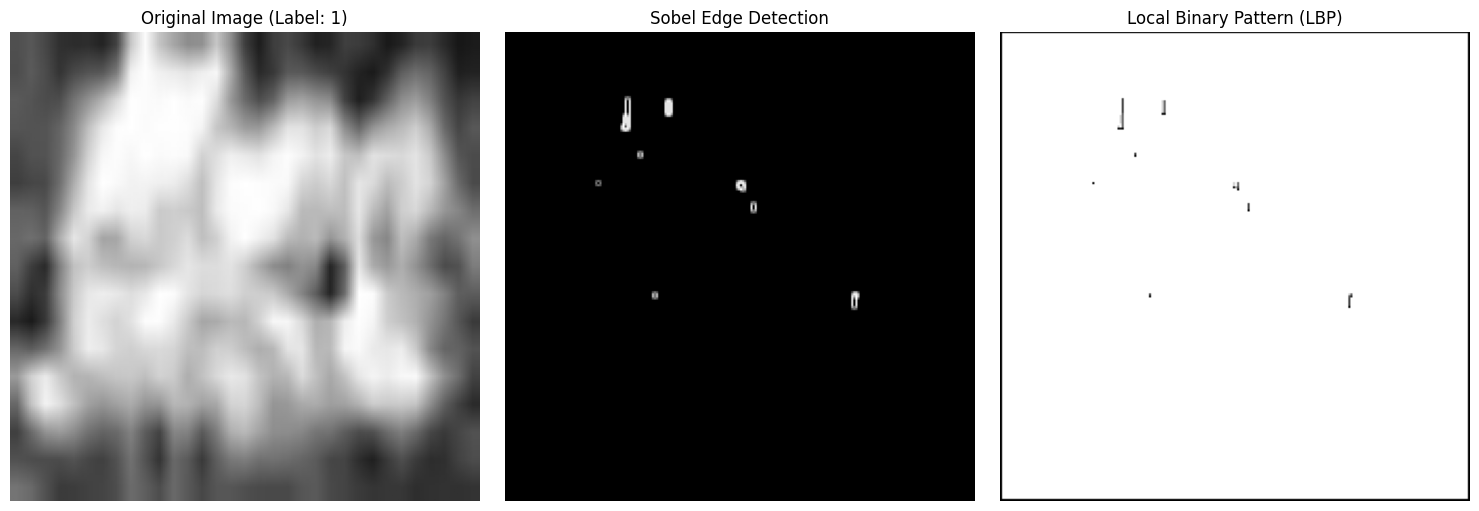

In [11]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

def convolve(image, kernel):
    height, width = image.shape
    output = np.zeros_like(image)
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i - 1:i + 2, j - 1:j + 2]
            output[i, j] = np.sum(region * kernel)
    return output

def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    neighbors = [
        (i, j) for i in range(-1, 2) for j in range(-1, 2) if (i, j) != (0, 0)
    ]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
           
            for k in range(8):
                neighbor_value = image[i + neighbors[k][0], j + neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    
    root_dir = r'/kaggle/input/tumor-trace'

    
    transform = transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  

    gradient_x = convolve(image_gray, sobel_x)
    gradient_y = convolve(image_gray, sobel_y)

    edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    edge_magnitude = (edge_magnitude / edge_magnitude.max()) * 255  

    lbp_image = compute_LBP(image_gray)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 3, 2)
    plt.imshow(edge_magnitude, cmap='gray')
    plt.axis('off')
    plt.title('Sobel Edge Detection')

    plt.subplot(1, 3, 3)
    plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  
    plt.axis('off')
    plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()


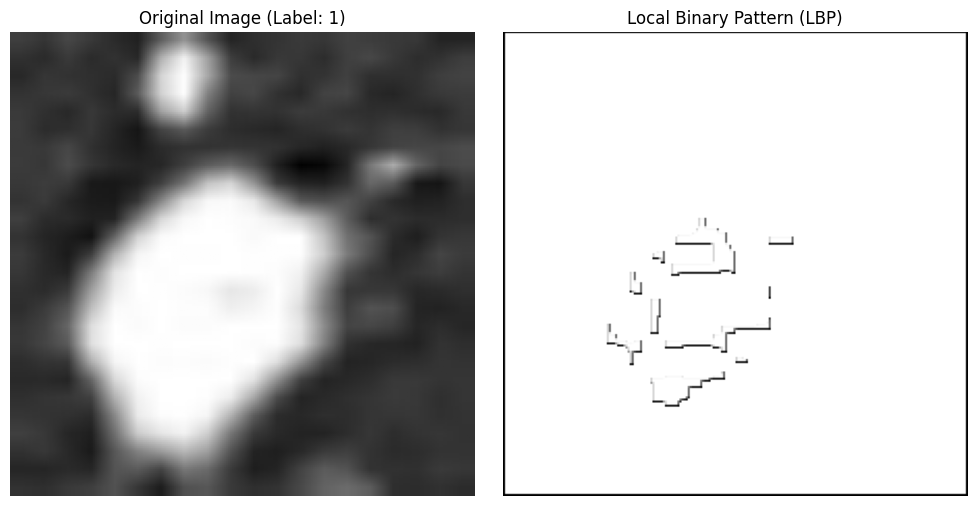

In [12]:
def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),           (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            for k in range(8):
                neighbor_value = image[i + neighbors[k][0], j + neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8)  

    lbp_image = compute_LBP(image_gray)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  
    plt.axis('off')
    plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()


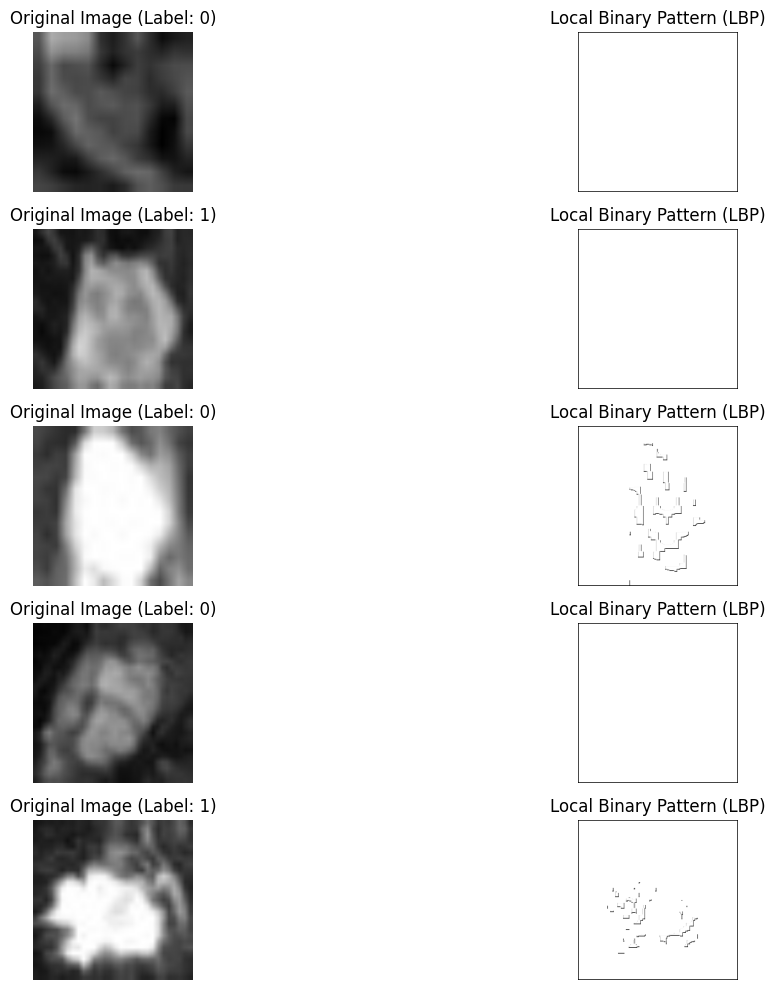

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms

def compute_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)

    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),           (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            for k in range(8):
                neighbor_value = image[i + neighbors[k][0], j + neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    plt.figure(figsize=(15, 10))
    
    for idx in range(5):
        random_index = random.randint(0, len(dataset) - 1)
        random_image, label = dataset[random_index]

        image_np = random_image.numpy()
        image_np = np.transpose(image_np, (1, 2, 0))
        image_gray = np.mean(image_np, axis=2).astype(np.uint8)  

        lbp_image = compute_LBP(image_gray)

        plt.subplot(5, 2, 2 * idx + 1)
        plt.imshow(image_np)
        plt.axis('off')
        plt.title(f'Original Image (Label: {label})')

        plt.subplot(5, 2, 2 * idx + 2)
        plt.imshow(lbp_image, cmap='gray', vmin=0, vmax=255)  
        plt.axis('off')
        plt.title('Local Binary Pattern (LBP)')

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_30/3149872303.py:31: RuntimeWarning: overflow encountered in scalar subtract
  if abs(neighbor_value - center_pixel) >= variance_value:


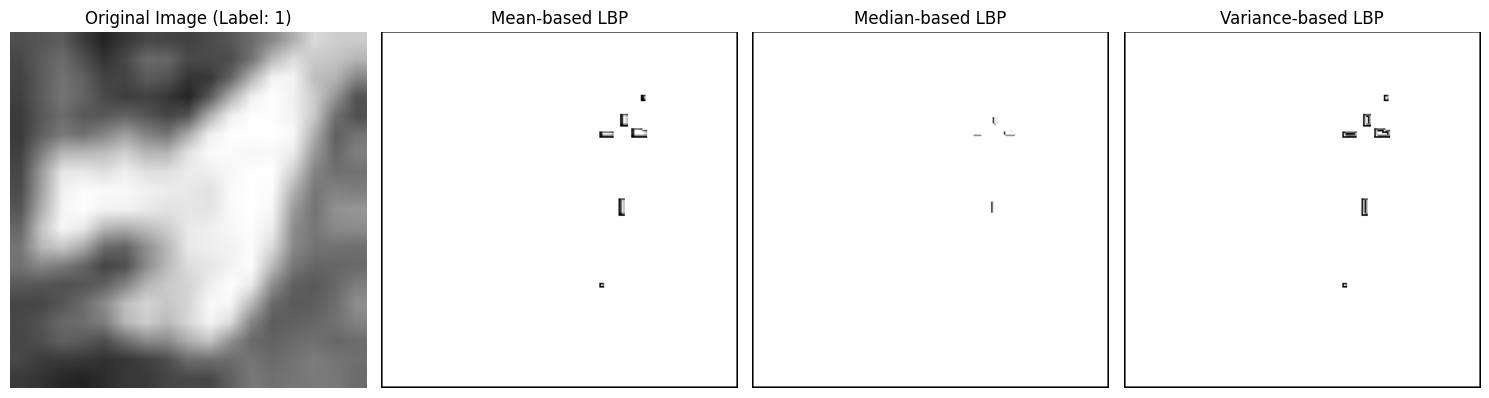

In [15]:
def compute_LBP_with_stats(image):
    height, width = image.shape
    lbp_mean = np.zeros((height, width), dtype=np.uint8)
    lbp_median = np.zeros((height, width), dtype=np.uint8)
    lbp_variance = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]

            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            neighbor_values = [image[n[0], n[1]] for n in neighbors]
            
            mean_value = np.mean(neighbor_values)
            median_value = np.median(neighbor_values)
            variance_value = np.var(neighbor_values)
            
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= mean_value:
                    lbp_mean[i, j] |= (1 << k)  
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= median_value:
                    lbp_median[i, j] |= (1 << k)  
            
            for k, neighbor_value in enumerate(neighbor_values):
                if abs(neighbor_value - center_pixel) >= variance_value:
                    lbp_variance[i, j] |= (1 << k)  

    return lbp_mean, lbp_median, lbp_variance

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8) 
    lbp_mean, lbp_median, lbp_variance = compute_LBP_with_stats(image_gray)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title(f'Original Image (Label: {label})')

    plt.subplot(1, 4, 2)
    plt.imshow(lbp_mean, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Mean-based LBP')

    plt.subplot(1, 4, 3)
    plt.imshow(lbp_median, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Median-based LBP')

    plt.subplot(1, 4, 4)
    plt.imshow(lbp_variance, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Variance-based LBP')

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_30/1175570501.py:32: RuntimeWarning: overflow encountered in scalar subtract
  if abs(neighbor_value - center_pixel) >= variance_value:


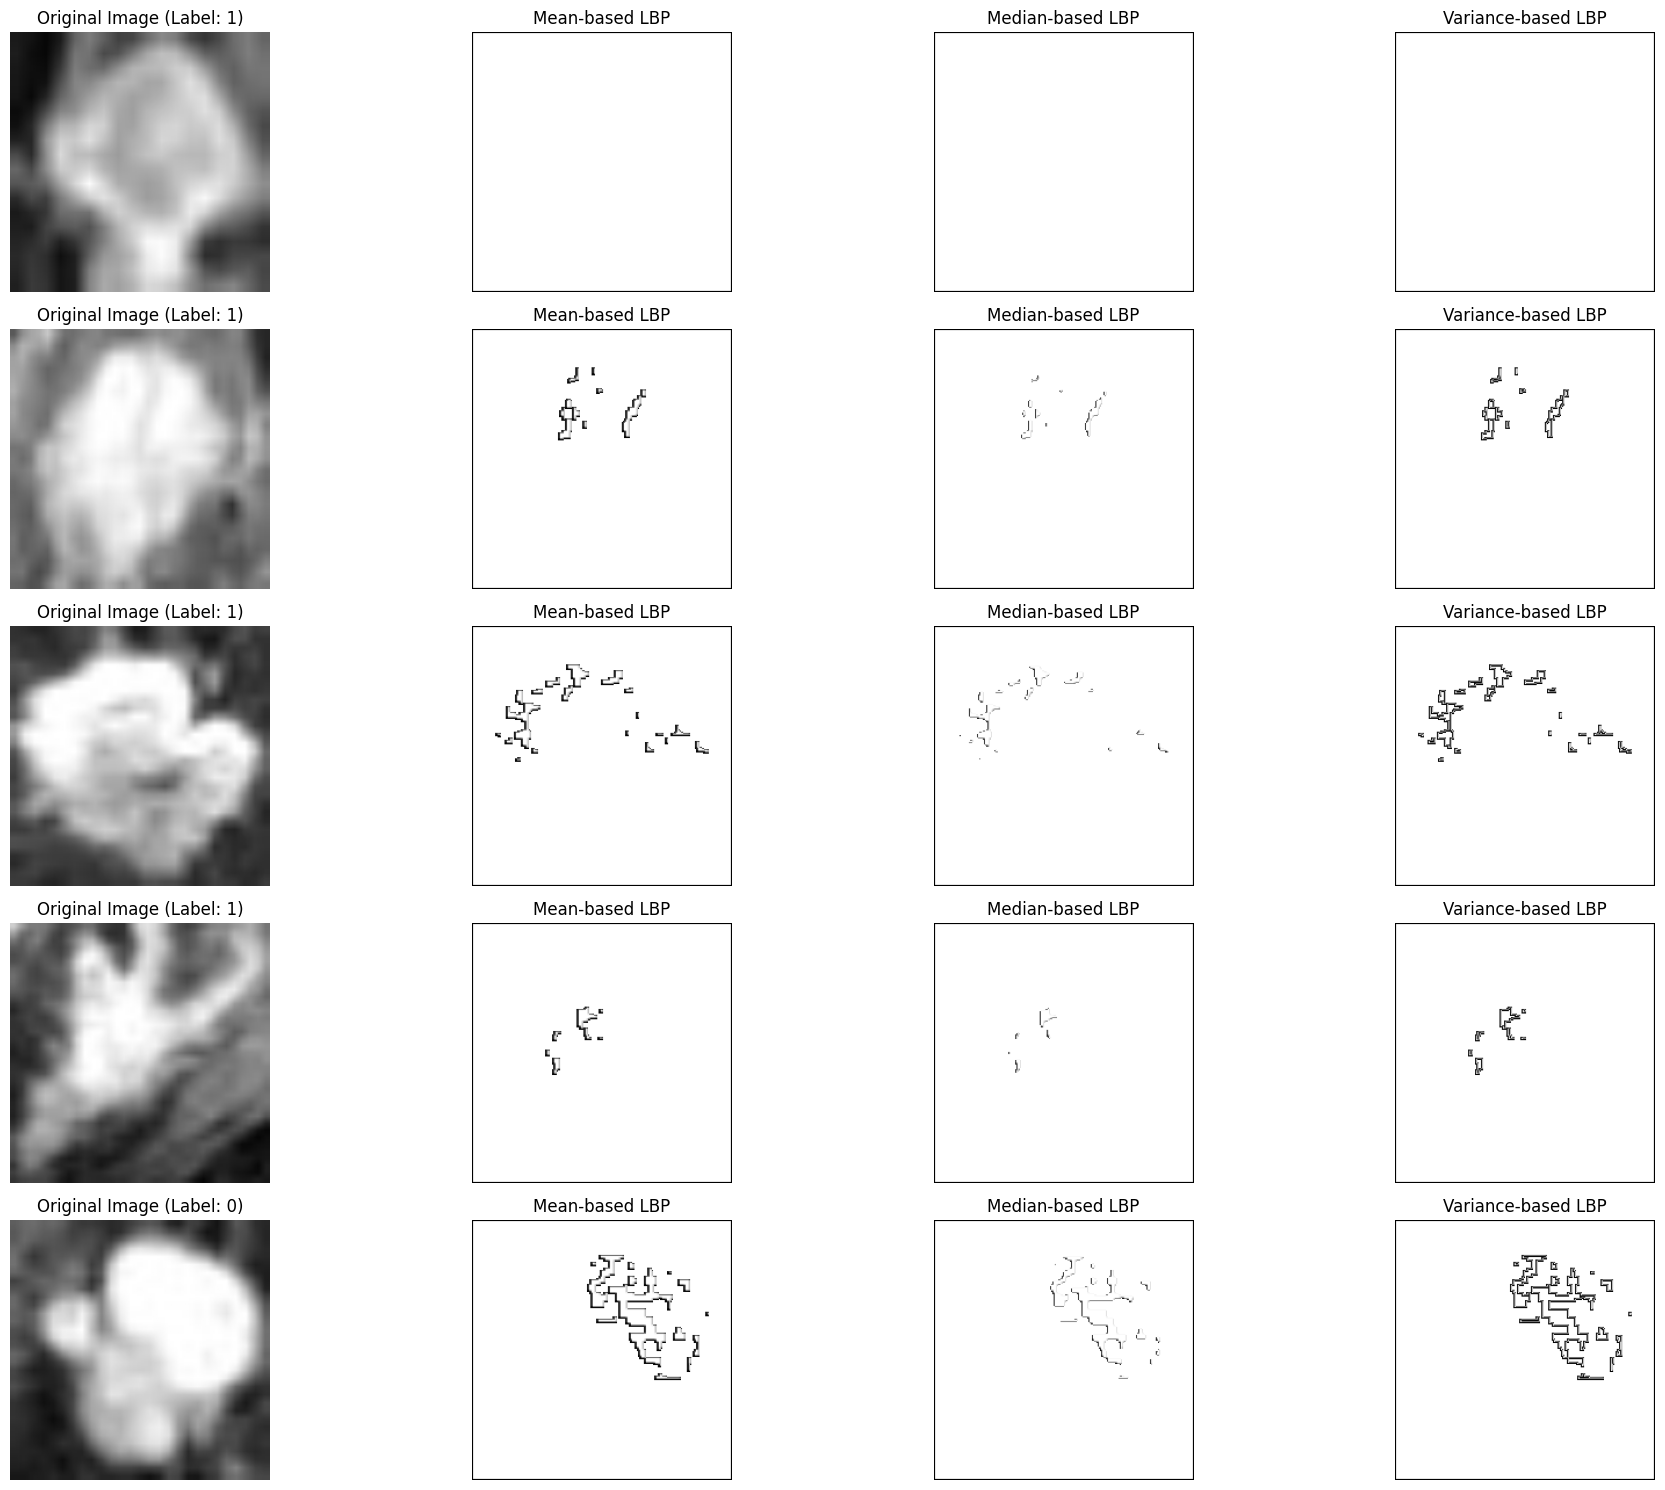

In [14]:
def compute_LBP_with_stats(image):
    height, width = image.shape
    lbp_mean = np.zeros((height, width), dtype=np.uint8)
    lbp_median = np.zeros((height, width), dtype=np.uint8)
    lbp_variance = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]

            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            neighbor_values = [image[n[0], n[1]] for n in neighbors]
            
            mean_value = np.mean(neighbor_values)
            median_value = np.median(neighbor_values)
            variance_value = np.var(neighbor_values)
            
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= mean_value:
                    lbp_mean[i, j] |= (1 << k)  
            
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= median_value:
                    lbp_median[i, j] |= (1 << k)  
        
            for k, neighbor_value in enumerate(neighbor_values):
                if abs(neighbor_value - center_pixel) >= variance_value:
                    lbp_variance[i, j] |= (1 << k)  
    return lbp_mean, lbp_median, lbp_variance

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    plt.figure(figsize=(20, 15))

    for idx in range(5):
        random_index = random.randint(0, len(dataset) - 1)
        random_image, label = dataset[random_index]

        image_np = random_image.numpy()
        image_np = np.transpose(image_np, (1, 2, 0))
        image_gray = np.mean(image_np, axis=2).astype(np.uint8)  

        lbp_mean, lbp_median, lbp_variance = compute_LBP_with_stats(image_gray)
        
        plt.subplot(5, 4, idx * 4 + 1)
        plt.imshow(image_np)
        plt.axis('off')
        plt.title(f'Original Image (Label: {label})')

        plt.subplot(5, 4, idx * 4 + 2)
        plt.imshow(lbp_mean, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.title('Mean-based LBP')

        plt.subplot(5, 4, idx * 4 + 3)
        plt.imshow(lbp_median, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.title('Median-based LBP')

        plt.subplot(5, 4, idx * 4 + 4)
        plt.imshow(lbp_variance, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.title('Variance-based LBP')

    plt.tight_layout()
    plt.show()


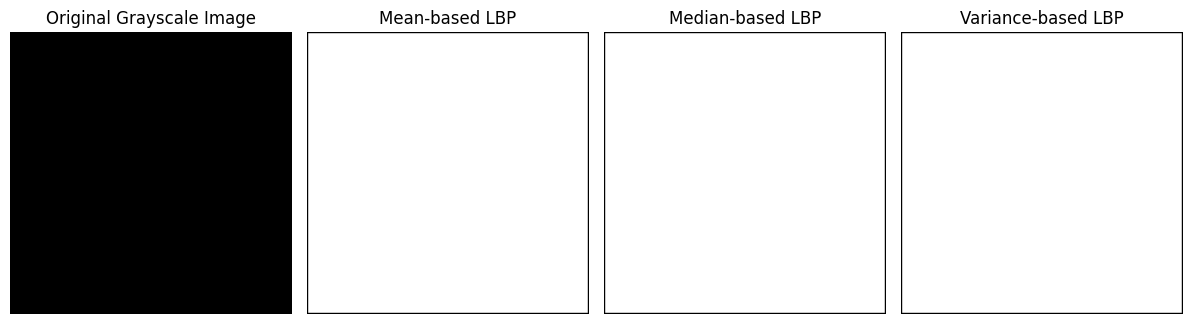

In [15]:
def compute_LBP_with_stats(image):
    height, width = image.shape
    lbp_mean = np.zeros((height, width), dtype=np.uint8)
    lbp_median = np.zeros((height, width), dtype=np.uint8)
    lbp_variance = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]

            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            neighbor_values = [image[n[0], n[1]] for n in neighbors]
            
            mean_value = np.mean(neighbor_values)
            median_value = np.median(neighbor_values)
            variance_value = np.var(neighbor_values)
            
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= mean_value:
                    lbp_mean[i, j] |= (1 << k)  
            for k, neighbor_value in enumerate(neighbor_values):
                if neighbor_value >= median_value:
                    lbp_median[i, j] |= (1 << k)  
            for k, neighbor_value in enumerate(neighbor_values):
                if abs(neighbor_value - center_pixel) >= variance_value:
                    lbp_variance[i, j] |= (1 << k)  
    lbp_mean = cv2.normalize(lbp_mean, None, 0, 255, cv2.NORM_MINMAX)
    lbp_median = cv2.normalize(lbp_median, None, 0, 255, cv2.NORM_MINMAX)
    lbp_variance = cv2.normalize(lbp_variance, None, 0, 255, cv2.NORM_MINMAX)

    return lbp_mean, lbp_median, lbp_variance

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
    ])
    dataset = datasets.ImageFolder(os.path.join(root_dir, 'train'), transform=transform)

    random_index = random.randint(0, len(dataset) - 1)
    random_image, label = dataset[random_index]

    image_np = random_image.numpy()
    image_np = np.transpose(image_np, (1, 2, 0))
    image_gray = np.mean(image_np, axis=2).astype(np.uint8) 

    lbp_mean, lbp_median, lbp_variance = compute_LBP_with_stats(image_gray)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 5, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.axis('off')
    plt.title('Original Grayscale Image')

    plt.subplot(1, 5, 2)
    plt.imshow(lbp_mean, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Mean-based LBP')

    plt.subplot(1, 5, 3)
    plt.imshow(lbp_median, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Median-based LBP')

    plt.subplot(1, 5, 4)
    plt.imshow(lbp_variance, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title('Variance-based LBP')

    plt.tight_layout()
    plt.show()


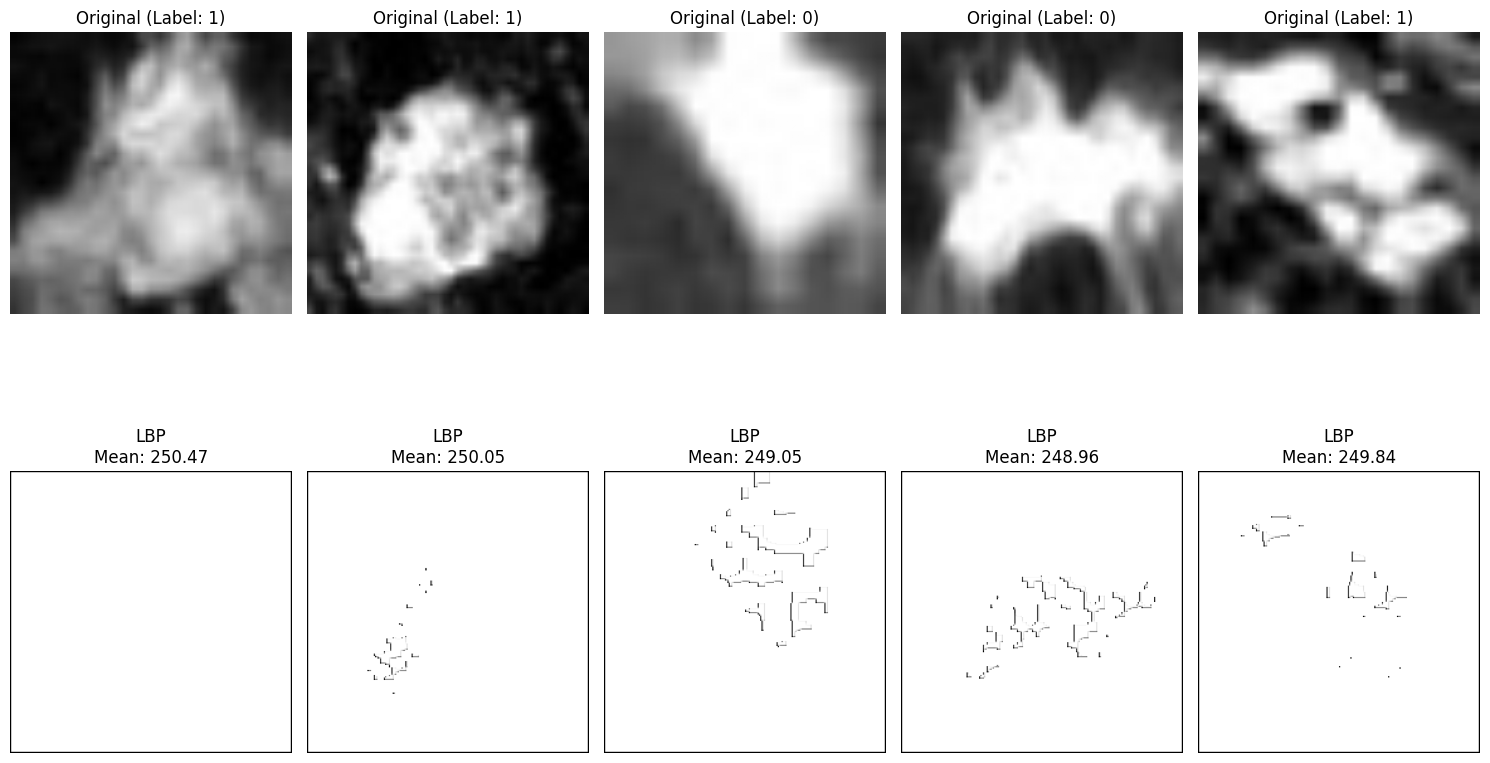

In [16]:
def compute_mean_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  
            
            lbp_image[i, j] = lbp_code

    mean_lbp = np.mean(lbp_image)
    return lbp_image, mean_lbp

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(root_dir, transform=transform)

    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  
        lbp_image, mean_lbp = compute_mean_LBP(img_gray)

        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP\nMean: {mean_lbp:.2f}')

    plt.tight_layout()
    plt.show()


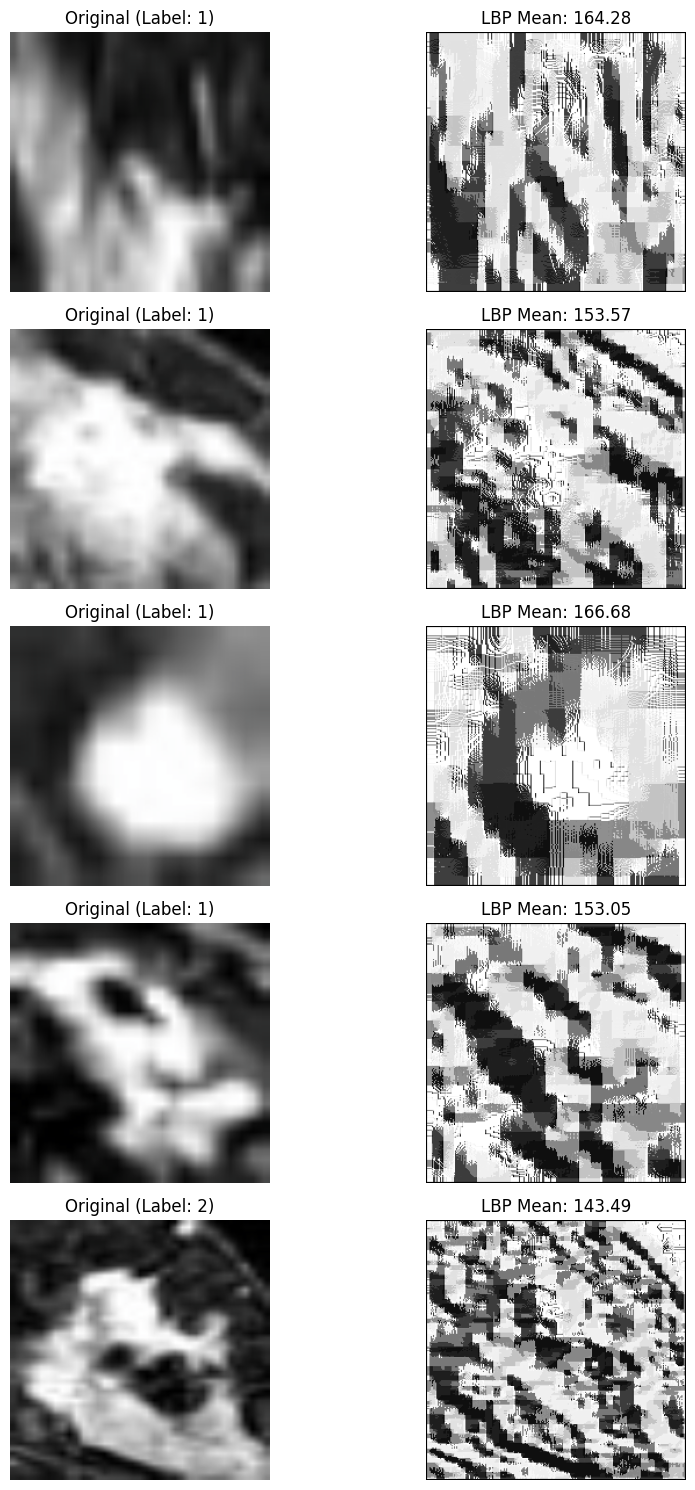

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

def compute_mean_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  
            
            lbp_image[i, j] = lbp_code

    mean_lbp = np.mean(lbp_image)
    return lbp_image, mean_lbp

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
    ])

    dataset = datasets.ImageFolder(root_dir, transform=transform)

    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    plt.figure(figsize=(10, 15))

    for i, (img, label) in enumerate(selected_images, start=1):
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  
        img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img_np = np.clip(img_np, 0, 1)  
        img_gray = (np.mean(img_np, axis=2) * 255).astype(np.uint8)  
        lbp_image, mean_lbp = compute_mean_LBP(img_gray)

        plt.subplot(5, 2, 2 * i - 1)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        plt.subplot(5, 2, 2 * i)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP Mean: {mean_lbp:.2f}')

    plt.tight_layout()
    plt.show()


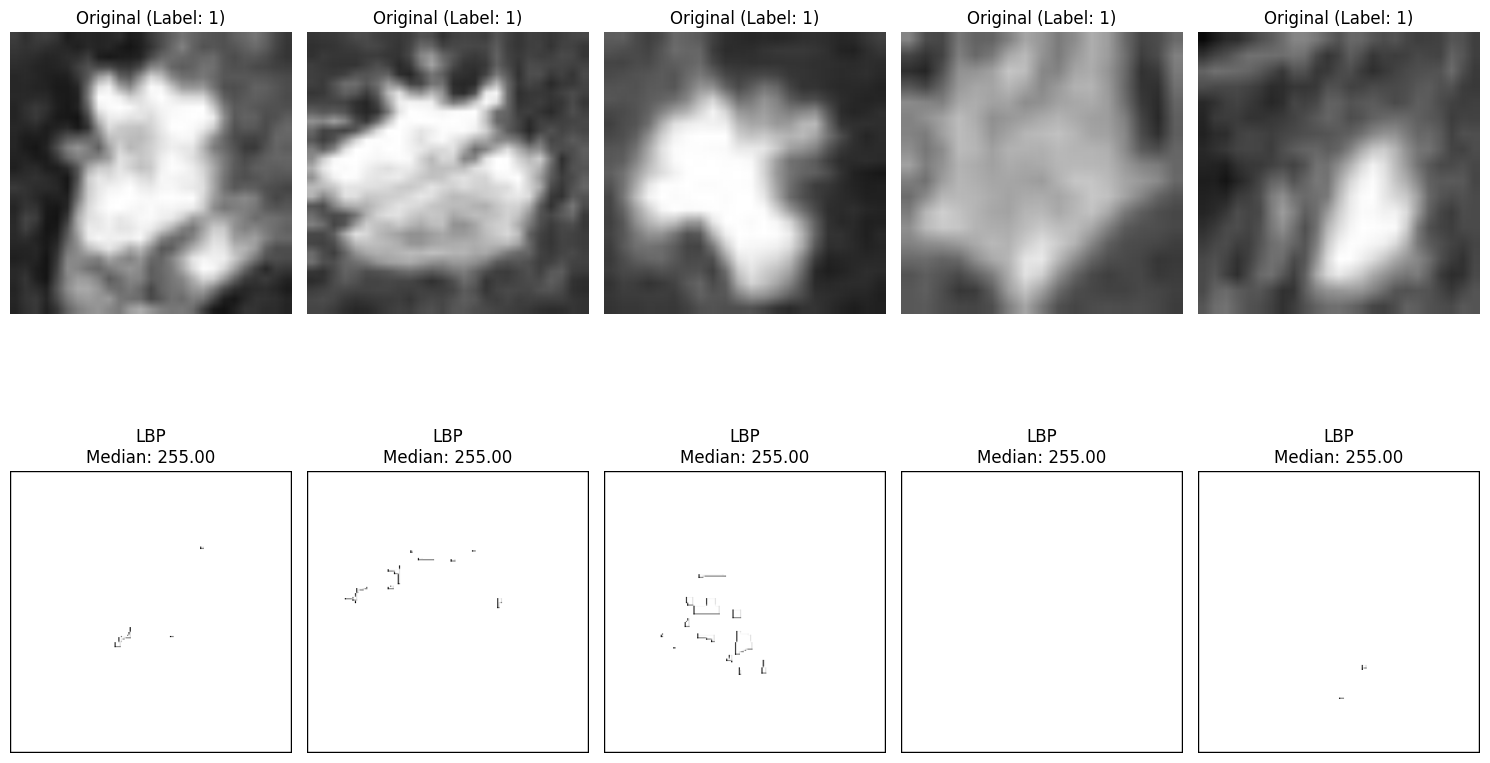

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

def compute_median_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  
            lbp_image[i, j] = lbp_code

    median_lbp = np.median(lbp_image)
    return lbp_image, median_lbp

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(root_dir, transform=transform)

    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  
        lbp_image, median_lbp = compute_median_LBP(img_gray)
        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP\nMedian: {median_lbp:.2f}')

    plt.tight_layout()
    plt.show()


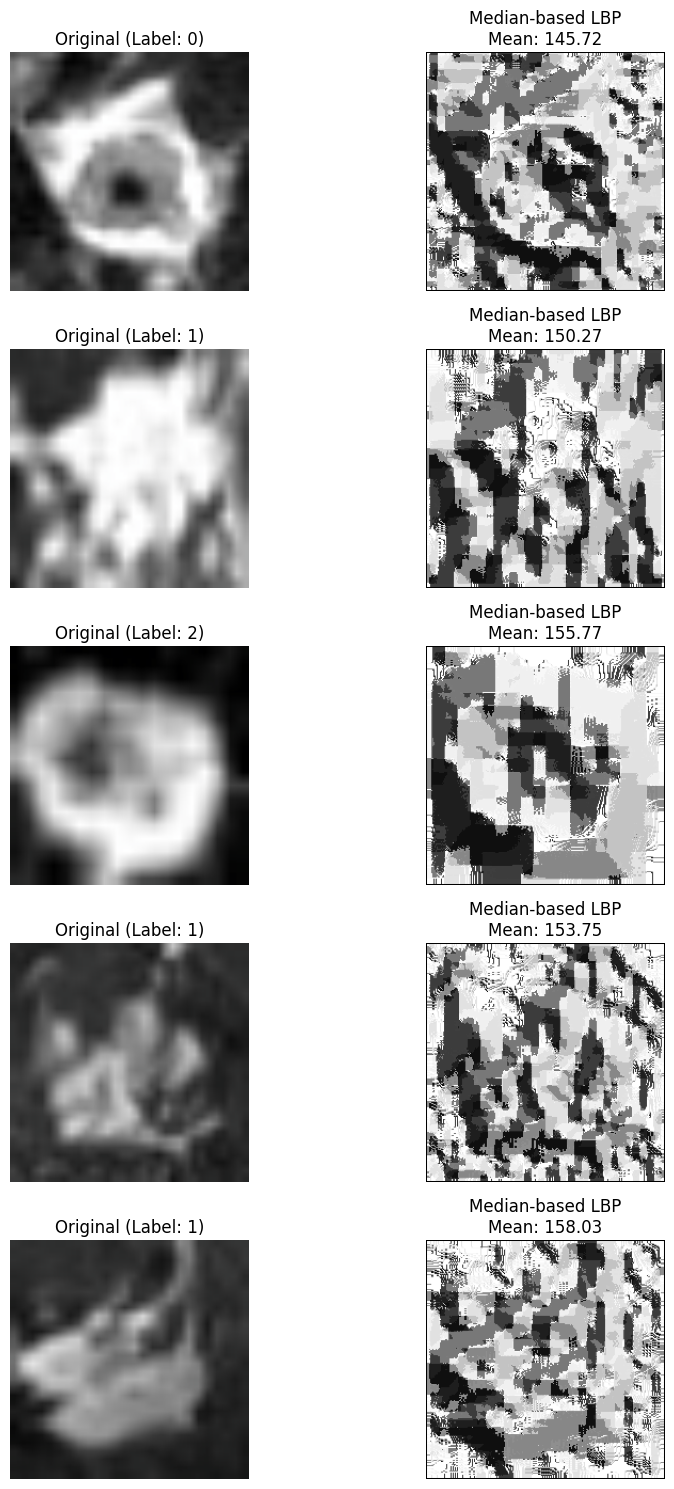

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

def compute_median_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            neighbors = [
                image[i - 1, j - 1], image[i - 1, j], image[i - 1, j + 1],
                image[i, j + 1], image[i + 1, j + 1], image[i + 1, j],
                image[i + 1, j - 1], image[i, j - 1]
            ]

            median_value = np.median(neighbors)
            
            lbp_code = 0
            for k, neighbor_value in enumerate(neighbors):
                if neighbor_value >= median_value:
                    lbp_code |= (1 << k)  
            
            lbp_image[i, j] = lbp_code  
    mean_lbp = np.mean(lbp_image)
    return lbp_image, mean_lbp

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (ImageNet values)
    ])

    dataset = datasets.ImageFolder(root_dir, transform=transform)

    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    plt.figure(figsize=(10, 15))

    for i, (img, label) in enumerate(selected_images, start=1):
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  
        img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img_np = np.clip(img_np, 0, 1)  
        img_gray = (np.mean(img_np, axis=2) * 255).astype(np.uint8) 
        lbp_image, mean_lbp = compute_median_LBP(img_gray)
        plt.subplot(5, 2, 2 * i - 1)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        plt.subplot(5, 2, 2 * i)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'Median-based LBP\nMean: {mean_lbp:.2f}')

    plt.tight_layout()
    plt.show()


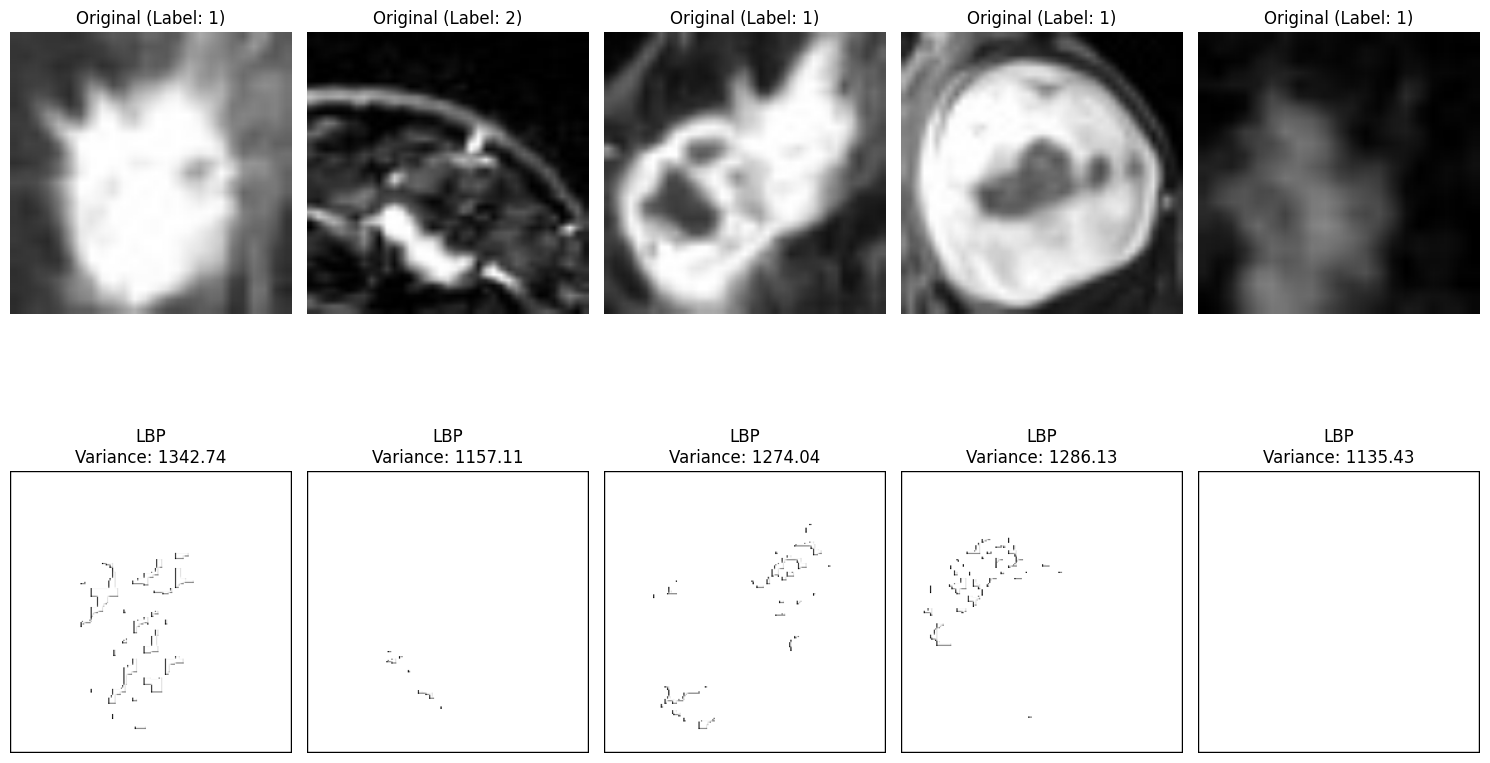

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

def compute_variance_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8) 

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]

            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  
            
            lbp_image[i, j] = lbp_code

    variance_lbp = np.var(lbp_image)
    return lbp_image, variance_lbp

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    # Data transformation
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(root_dir, transform=transform)

    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  
        lbp_image, variance_lbp = compute_variance_LBP(img_gray)

        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP\nVariance: {variance_lbp:.2f}')

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_30/3384202271.py:25: RuntimeWarning: overflow encountered in scalar subtract
  if abs(neighbor_value - center_pixel) >= variance_value:


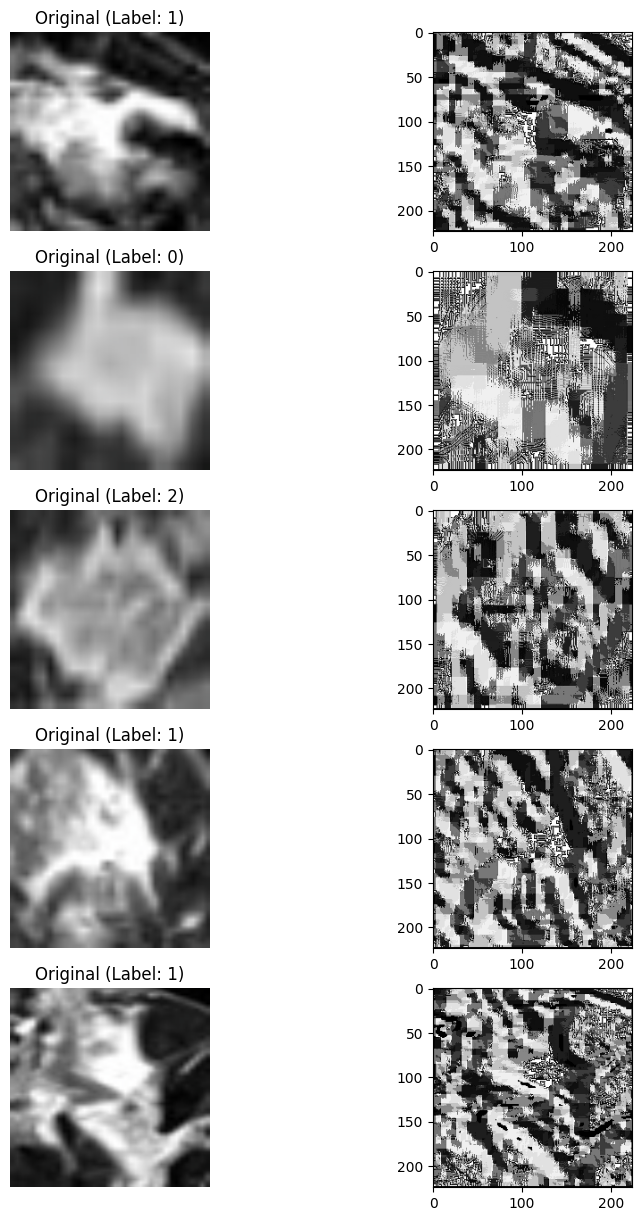

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms
from PIL import Image

def compute_variance_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            neighbors = [
                image[i - 1, j - 1], image[i - 1, j], image[i - 1, j + 1],
                image[i, j + 1], image[i + 1, j + 1], image[i + 1, j],
                image[i + 1, j - 1], image[i, j - 1]
            ]
            variance_value = np.var(neighbors)

            lbp_code = 0
            for k, neighbor_value in enumerate(neighbors):
                if abs(neighbor_value - center_pixel) >= variance_value:
                    lbp_code |= (1 << k)  
            
            lbp_image[i, j] = lbp_code  

    mean_lbp = np.mean(lbp_image)
    return lbp_image, mean_lbp

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
    ])

    dataset = datasets.ImageFolder(root_dir, transform=transform)

    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    plt.figure(figsize=(10, 15))

    for i, (img, label) in enumerate(selected_images, start=1):
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  
        img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img_np = np.clip(img_np, 0, 1)  # Clip to [0, 1] 
        img_gray = (np.mean(img_np, axis=2) * 255).astype(np.uint8)  
        lbp_image, mean_lbp = compute_variance_LBP(img_gray)

        plt.subplot(5, 2, 2 * i - 1)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        plt.subplot(5, 2, 2 * i)
        plt.imshow(lbp_image, cmap='gray')


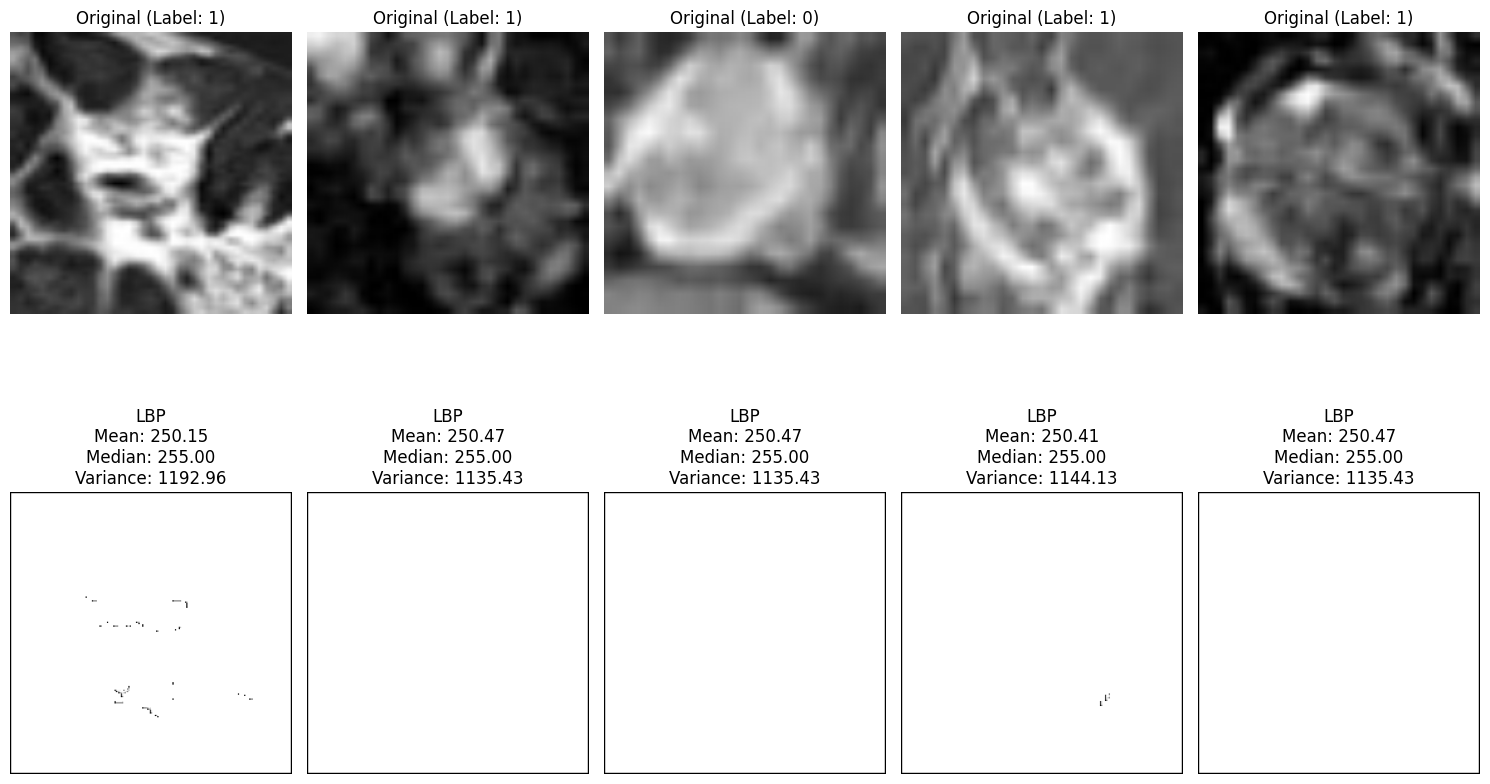

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from torchvision import datasets, transforms

def compute_LBP_statistics(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            lbp_code = 0
            
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]

            
            for k in range(8):
                neighbor_value = image[neighbors[k][0], neighbors[k][1]]
                if neighbor_value >= center_pixel:
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    mean_lbp = np.mean(lbp_image)
    median_lbp = np.median(lbp_image)
    variance_lbp = np.var(lbp_image)
    return lbp_image, mean_lbp, median_lbp, variance_lbp

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(root_dir, transform=transform)

    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        # Convert to numpy and grayscale
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0)) 
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  

        lbp_image, mean_lbp, median_lbp, variance_lbp = compute_LBP_statistics(img_gray)

        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title(f'LBP\nMean: {mean_lbp:.2f}\nMedian: {median_lbp:.2f}\nVariance: {variance_lbp:.2f}')

    plt.tight_layout()
    plt.show()


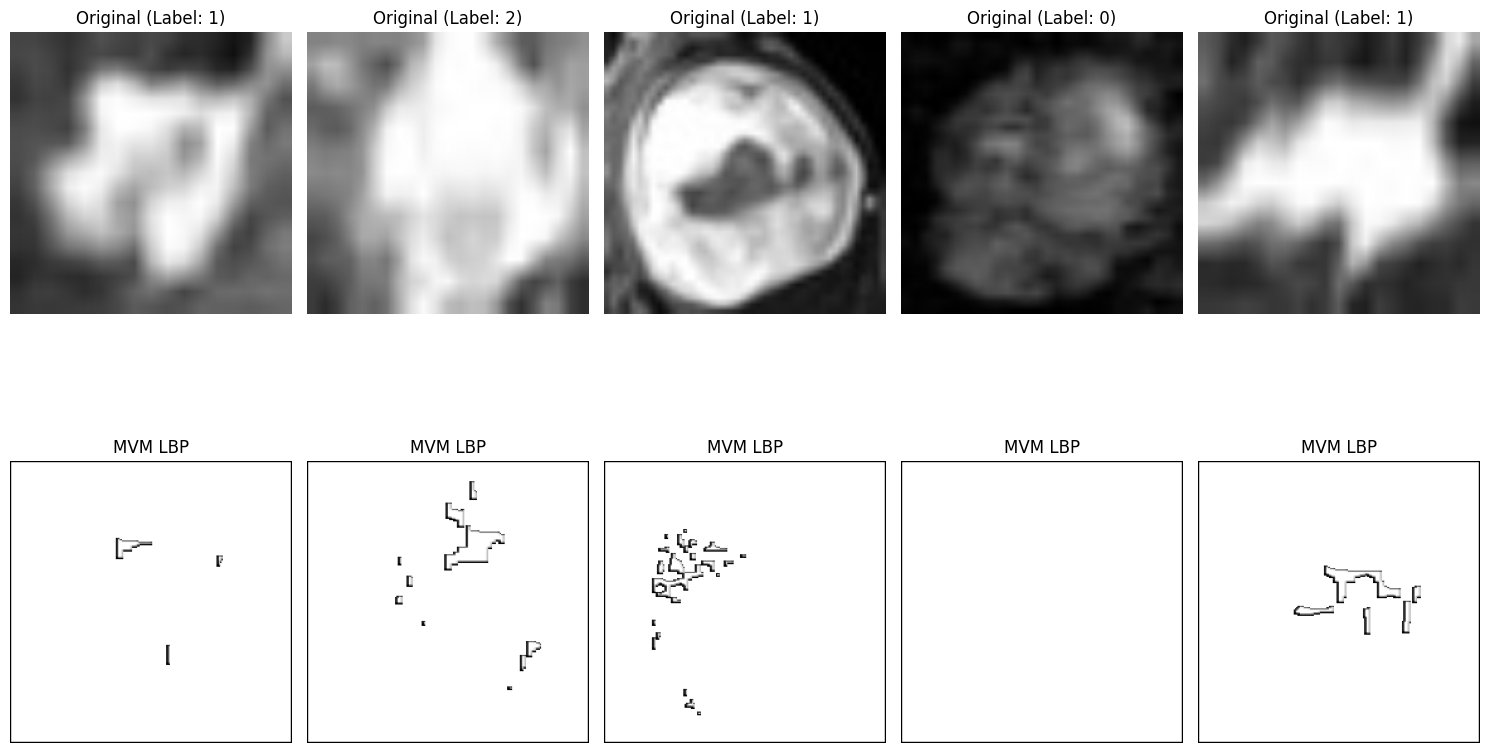

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
from torchvision import datasets, transforms

def compute_MVM_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            neighbor_values = np.array([image[ni, nj] for ni, nj in neighbors])
            mean = np.mean(neighbor_values)
            variance = np.var(neighbor_values)

            lbp_code = 0
            for k, (ni, nj) in enumerate(neighbors):
                if image[ni, nj] >= mean: 
                    lbp_code |= (1 << k)  
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    root_dir = r'/kaggle/input/tumor-trace'

    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fit model input size
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(root_dir, transform=transform)

    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format
        img_gray = np.mean(img_np, axis=2).astype(np.uint8)  # Convert to grayscale

        lbp_image = compute_MVM_LBP(img_gray)

        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        # Display the LBP image
        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title('MVM LBP')

    plt.tight_layout()
    plt.show()


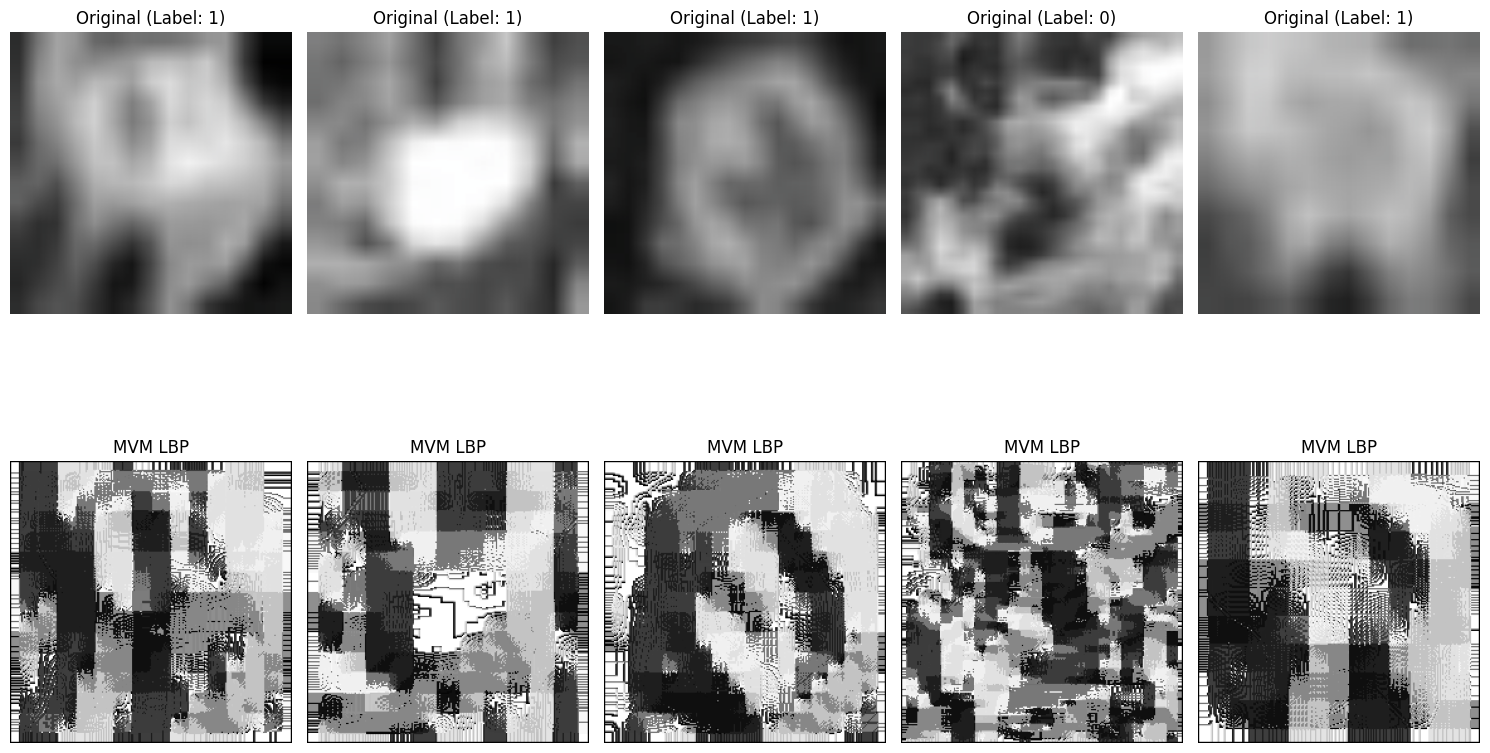

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random
from torchvision import datasets, transforms
def compute_MVM_LBP(image):
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)  # Initialize LBP image

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center_pixel = image[i, j]
            
            
            neighbors = [
                (i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
                (i, j + 1), (i + 1, j + 1), (i + 1, j),
                (i + 1, j - 1), (i, j - 1)
            ]
            
            
            neighbor_values = np.array([image[ni, nj] for ni, nj in neighbors])
            mean = np.mean(neighbor_values)
            variance = np.var(neighbor_values)

            lbp_code = 0
            
            for k, (ni, nj) in enumerate(neighbors):
                if image[ni, nj] >= mean:  # You can adjust the threshold condition
                    lbp_code |= (1 << k)  # Set the k-th bit if the neighbor is greater or equal
            
            lbp_image[i, j] = lbp_code

    return lbp_image

if __name__ == "__main__":
    # Directory path to images
    root_dir = r'/kaggle/input/tumor-trace'

    
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
    ])

    
    dataset = datasets.ImageFolder(root_dir, transform=transform)

   
    random_indices = random.sample(range(len(dataset)), 5)
    selected_images = [dataset[idx] for idx in random_indices]

    
    plt.figure(figsize=(15, 10))

    for i, (img, label) in enumerate(selected_images, start=1):
        
        img_np = img.numpy()
        img_np = np.transpose(img_np, (1, 2, 0))  # Convert to H x W x C format

        
        img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img_np = np.clip(img_np, 0, 1)  # Clip to [0, 1] range for display

        
        img_gray = (np.mean(img_np, axis=2) * 255).astype(np.uint8)  # Scale back to uint8

        
        lbp_image = compute_MVM_LBP(img_gray)

        
        plt.subplot(2, 5, i)
        plt.imshow(img_np)
        plt.axis('off')
        plt.title(f'Original (Label: {label})')

        
        plt.subplot(2, 5, i + 5)
        plt.imshow(lbp_image, cmap='gray')
        plt.axis('off')
        plt.title('MVM LBP')

    plt.tight_layout()
    plt.show()


In [27]:
pip install -U scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 88.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.23.2
    Uninstalling scikit-image-0.23.2:
      Successfully uninstalled scikit-image-0.23.2
Note: you may need to restart the kernel to use updated packages.


VGG16

In [28]:
import torchvision.models as models

# Initialize VGG16 without pre-trained weights
vgg16 = models.vgg16(pretrained=True)

# Set the model to evaluation mode
vgg16.eval()

# Print the model architecture
print(vgg16)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 240MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [29]:
import torch
import torch.nn as nn
import torchvision.models as models

class CustomVGG16(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomVGG16, self).__init__()
        
        vgg16 = models.vgg16(pretrained=True)
        
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),  
            nn.ReLU(),                     
            nn.Dropout(),                  
            nn.Linear(4096, 4096),         
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)    
        )

    def forward(self, x):
        x = self.features(x)
        
        x = self.avgpool(x)
        
        x = torch.flatten(x, 1)
        
        x = self.classifier(x)
        
        return x


In [30]:
model = CustomVGG16(num_classes=2)
print(model)

CustomVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import os

**Device configuration**

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

**EarlyStopping Class**

In [33]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='/kaggle/working/models/VGG16_best.pth'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f"Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss




**Custom VGG16 Model**

In [34]:
class CustomVGG16(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomVGG16, self).__init__()
        vgg16 = models.vgg16(pretrained=True)
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

**Training Function**

In [35]:
def train(epoch, model, num_epochs, loader, criterion, l2_decay=0.01, lr=0.001):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0
    for data, label in tqdm(loader, desc=f"Epoch {epoch}/{num_epochs}", unit="batch"):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f"Train Accuracy: {accuracy:.2f}%")
    return accuracy

**Validation Function**

In [36]:
def validate(model, loader, criterion):
    model.eval()
    val_loss = 0
    correct = 0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for data, label in loader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            val_loss += criterion(output, label).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()

            # Append ground truth and predicted probabilities for the positive class
            all_labels.append(label.cpu().numpy())
            all_outputs.append(output[:, 1].cpu().numpy())  # Probabilities for class 1

    # Concatenate results into single arrays
    all_labels = np.concatenate(all_labels)
    all_outputs = np.concatenate(all_outputs)

    # Compute ROC and AUC
    fpr, tpr, _ = roc_curve(all_labels, all_outputs)
    auc_value = auc(fpr, tpr)

    # Calculate average validation loss and accuracy
    val_loss /= len(loader)
    accuracy = 100. * correct / len(loader.dataset)

    print(f"Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%, AUC: {auc_value:.4f}")
    return accuracy, val_loss, auc_value



**Save Model**

In [38]:
def save_model(model, save_dir, model_name, current_auc, best_auc):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    model_save_path = os.path.join(save_dir, f"{model_name}_best.pth")
    if current_auc > best_auc:  # Save only if AUC improves
        best_auc = current_auc
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at: {model_save_path} with improved AUC: {best_auc:.4f}")
    else:
        print(f"No improvement in AUC: {current_auc:.4f} (Best: {best_auc:.4f})")
    return best_auc


**Training and Validation Loop**

In [39]:
model = CustomVGG16(num_classes=2).to(device)
num_epochs = 50
criterion = nn.CrossEntropyLoss()
l2_decay = 0.01
lr = 0.001
best_auc = 0.0
model_name = "vgg16"
save_dir = "/kaggle/working/models"

# Assuming train_loader and val_loader are defined earlier
for epoch in range(1, num_epochs + 1):
    train_accuracy = train(epoch, model, num_epochs, train_loader, criterion, l2_decay, lr)

    val_accuracy, val_loss, current_auc = validate(model, val_loader, criterion)

    best_auc = save_model(model, save_dir, model_name, current_auc, best_auc)

    print(f"Epoch {epoch}/{num_epochs} completed.")

# Load the saved model
model.load_state_dict(torch.load(os.path.join(save_dir, f"{model_name}_best.pth")))
model.eval()
print("Best model loaded successfully!")

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/50: 100%|██████████| 639/639 [02:44<00:00,  3.87batch/s]

Train Accuracy: 86.07%


Validation Loss: 0.6209, Accuracy: 76.42%, AUC: 0.8589
Model saved at: /kaggle/working/models/vgg16_best.pth with improved AUC: 0.8589
Epoch 1/50 completed.


Epoch 2/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 96.28%


Validation Loss: 0.4906, Accuracy: 81.25%, AUC: 0.8632
Model saved at: /kaggle/working/models/vgg16_best.pth with improved AUC: 0.8632
Epoch 2/50 completed.


Epoch 3/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 98.11%


Validation Loss: 0.5730, Accuracy: 81.95%, AUC: 0.8683
Model saved at: /kaggle/working/models/vgg16_best.pth with improved AUC: 0.8683
Epoch 3/50 completed.


Epoch 4/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 98.88%


Validation Loss: 0.5562, Accuracy: 79.99%, AUC: 0.8570
No improvement in AUC: 0.8570 (Best: 0.8683)
Epoch 4/50 completed.


Epoch 5/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.09%


Validation Loss: 0.6503, Accuracy: 78.58%, AUC: 0.8477
No improvement in AUC: 0.8477 (Best: 0.8683)
Epoch 5/50 completed.


Epoch 6/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.22%


Validation Loss: 0.5478, Accuracy: 81.80%, AUC: 0.8507
No improvement in AUC: 0.8507 (Best: 0.8683)
Epoch 6/50 completed.


Epoch 7/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.25%


Validation Loss: 0.5349, Accuracy: 83.41%, AUC: 0.8707
Model saved at: /kaggle/working/models/vgg16_best.pth with improved AUC: 0.8707
Epoch 7/50 completed.


Epoch 8/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.06%


Validation Loss: 0.4891, Accuracy: 83.11%, AUC: 0.8581
No improvement in AUC: 0.8581 (Best: 0.8707)
Epoch 8/50 completed.


Epoch 9/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.10%


Validation Loss: 0.4721, Accuracy: 84.11%, AUC: 0.8743
Model saved at: /kaggle/working/models/vgg16_best.pth with improved AUC: 0.8743
Epoch 9/50 completed.


Epoch 10/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.81%


Validation Loss: 0.5105, Accuracy: 84.36%, AUC: 0.8886
Model saved at: /kaggle/working/models/vgg16_best.pth with improved AUC: 0.8886
Epoch 10/50 completed.


Epoch 11/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.93%


Validation Loss: 0.5534, Accuracy: 84.01%, AUC: 0.8821
No improvement in AUC: 0.8821 (Best: 0.8886)
Epoch 11/50 completed.


Epoch 12/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.90%


Validation Loss: 0.5750, Accuracy: 83.81%, AUC: 0.8842
No improvement in AUC: 0.8842 (Best: 0.8886)
Epoch 12/50 completed.


Epoch 13/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.94%


Validation Loss: 0.6080, Accuracy: 83.26%, AUC: 0.8805
No improvement in AUC: 0.8805 (Best: 0.8886)
Epoch 13/50 completed.


Epoch 14/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.95%


Validation Loss: 0.5821, Accuracy: 83.11%, AUC: 0.8816
No improvement in AUC: 0.8816 (Best: 0.8886)
Epoch 14/50 completed.


Epoch 15/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.95%


Validation Loss: 0.5943, Accuracy: 83.61%, AUC: 0.8801
No improvement in AUC: 0.8801 (Best: 0.8886)
Epoch 15/50 completed.


Epoch 16/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.94%


Validation Loss: 0.6136, Accuracy: 83.01%, AUC: 0.8754
No improvement in AUC: 0.8754 (Best: 0.8886)
Epoch 16/50 completed.


Epoch 17/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.95%


Validation Loss: 0.5929, Accuracy: 83.11%, AUC: 0.8770
No improvement in AUC: 0.8770 (Best: 0.8886)
Epoch 17/50 completed.


Epoch 18/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.96%


Validation Loss: 0.5981, Accuracy: 83.61%, AUC: 0.8796
No improvement in AUC: 0.8796 (Best: 0.8886)
Epoch 18/50 completed.


Epoch 19/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.96%


Validation Loss: 0.5903, Accuracy: 84.41%, AUC: 0.8739
No improvement in AUC: 0.8739 (Best: 0.8886)
Epoch 19/50 completed.


Epoch 20/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5856, Accuracy: 83.56%, AUC: 0.8783
No improvement in AUC: 0.8783 (Best: 0.8886)
Epoch 20/50 completed.


Epoch 21/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5900, Accuracy: 83.46%, AUC: 0.8779
No improvement in AUC: 0.8779 (Best: 0.8886)
Epoch 21/50 completed.


Epoch 22/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5905, Accuracy: 83.31%, AUC: 0.8767
No improvement in AUC: 0.8767 (Best: 0.8886)
Epoch 22/50 completed.


Epoch 23/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5910, Accuracy: 83.36%, AUC: 0.8778
No improvement in AUC: 0.8778 (Best: 0.8886)
Epoch 23/50 completed.


Epoch 24/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5945, Accuracy: 83.11%, AUC: 0.8777
No improvement in AUC: 0.8777 (Best: 0.8886)
Epoch 24/50 completed.


Epoch 25/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5956, Accuracy: 83.01%, AUC: 0.8765
No improvement in AUC: 0.8765 (Best: 0.8886)
Epoch 25/50 completed.


Epoch 26/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.99%


Validation Loss: 0.5858, Accuracy: 83.71%, AUC: 0.8768
No improvement in AUC: 0.8768 (Best: 0.8886)
Epoch 26/50 completed.


Epoch 27/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5909, Accuracy: 83.41%, AUC: 0.8768
No improvement in AUC: 0.8768 (Best: 0.8886)
Epoch 27/50 completed.


Epoch 28/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 100.00%


Validation Loss: 0.5892, Accuracy: 83.56%, AUC: 0.8771
No improvement in AUC: 0.8771 (Best: 0.8886)
Epoch 28/50 completed.


Epoch 29/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 0.5931, Accuracy: 83.41%, AUC: 0.8773
No improvement in AUC: 0.8773 (Best: 0.8886)
Epoch 29/50 completed.


Epoch 30/50: 100%|██████████| 639/639 [02:43<00:00,  3.90batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5908, Accuracy: 83.31%, AUC: 0.8782
No improvement in AUC: 0.8782 (Best: 0.8886)
Epoch 30/50 completed.


Epoch 31/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5946, Accuracy: 83.11%, AUC: 0.8776
No improvement in AUC: 0.8776 (Best: 0.8886)
Epoch 31/50 completed.


Epoch 32/50: 100%|██████████| 639/639 [02:44<00:00,  3.90batch/s]

Train Accuracy: 99.99%


Validation Loss: 0.5892, Accuracy: 83.51%, AUC: 0.8777
No improvement in AUC: 0.8777 (Best: 0.8886)
Epoch 32/50 completed.


Epoch 33/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5933, Accuracy: 83.41%, AUC: 0.8774
No improvement in AUC: 0.8774 (Best: 0.8886)
Epoch 33/50 completed.


Epoch 34/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5874, Accuracy: 83.36%, AUC: 0.8780
No improvement in AUC: 0.8780 (Best: 0.8886)
Epoch 34/50 completed.


Epoch 35/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5863, Accuracy: 83.56%, AUC: 0.8779
No improvement in AUC: 0.8779 (Best: 0.8886)
Epoch 35/50 completed.


Epoch 36/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5888, Accuracy: 83.31%, AUC: 0.8781
No improvement in AUC: 0.8781 (Best: 0.8886)
Epoch 36/50 completed.


Epoch 37/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5908, Accuracy: 83.41%, AUC: 0.8775
No improvement in AUC: 0.8775 (Best: 0.8886)
Epoch 37/50 completed.


Epoch 38/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 0.5901, Accuracy: 83.16%, AUC: 0.8776
No improvement in AUC: 0.8776 (Best: 0.8886)
Epoch 38/50 completed.


Epoch 39/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 0.5915, Accuracy: 83.41%, AUC: 0.8773
No improvement in AUC: 0.8773 (Best: 0.8886)
Epoch 39/50 completed.


Epoch 40/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5902, Accuracy: 83.31%, AUC: 0.8780
No improvement in AUC: 0.8780 (Best: 0.8886)
Epoch 40/50 completed.


Epoch 41/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 0.5895, Accuracy: 83.16%, AUC: 0.8781
No improvement in AUC: 0.8781 (Best: 0.8886)
Epoch 41/50 completed.


Epoch 42/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5865, Accuracy: 83.36%, AUC: 0.8777
No improvement in AUC: 0.8777 (Best: 0.8886)
Epoch 42/50 completed.


Epoch 43/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5893, Accuracy: 83.26%, AUC: 0.8770
No improvement in AUC: 0.8770 (Best: 0.8886)
Epoch 43/50 completed.


Epoch 44/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.99%


Validation Loss: 0.5889, Accuracy: 83.16%, AUC: 0.8778
No improvement in AUC: 0.8778 (Best: 0.8886)
Epoch 44/50 completed.


Epoch 45/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5912, Accuracy: 83.11%, AUC: 0.8775
No improvement in AUC: 0.8775 (Best: 0.8886)
Epoch 45/50 completed.


Epoch 46/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5914, Accuracy: 83.11%, AUC: 0.8764
No improvement in AUC: 0.8764 (Best: 0.8886)
Epoch 46/50 completed.


Epoch 47/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.98%


Validation Loss: 0.5903, Accuracy: 83.21%, AUC: 0.8778
No improvement in AUC: 0.8778 (Best: 0.8886)
Epoch 47/50 completed.


Epoch 48/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5873, Accuracy: 83.26%, AUC: 0.8776
No improvement in AUC: 0.8776 (Best: 0.8886)
Epoch 48/50 completed.


Epoch 49/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5852, Accuracy: 83.26%, AUC: 0.8775
No improvement in AUC: 0.8775 (Best: 0.8886)
Epoch 49/50 completed.


Epoch 50/50: 100%|██████████| 639/639 [02:44<00:00,  3.89batch/s]

Train Accuracy: 99.97%


Validation Loss: 0.5820, Accuracy: 83.41%, AUC: 0.8791
No improvement in AUC: 0.8791 (Best: 0.8886)
Epoch 50/50 completed.


/tmp/ipykernel_30/3969790784.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, f"{model_name}_best.pth")))


Best model loaded successfully!


In [85]:
#import shutil
#shutil.rmtree('/kaggle/working/models')  # Delete models directory if needed


**Testing Function**

Test Accuracy: 74.27%
Test Loss: 1.2546


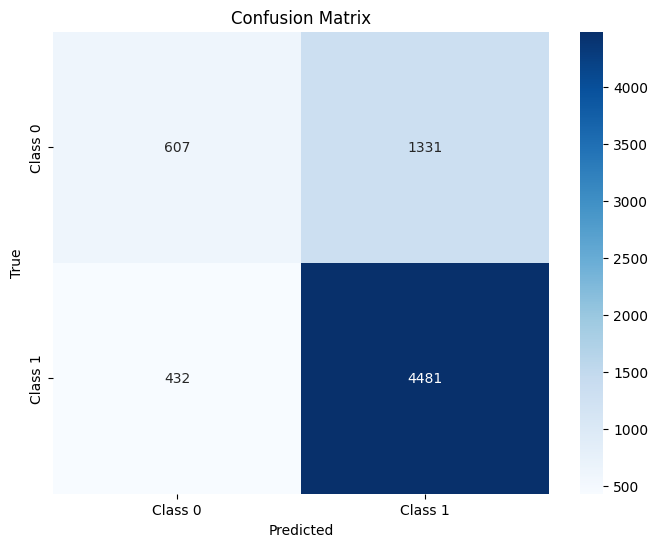

Test AUC: 0.8226
Test Accuracy: 74.27%
Test Loss: 1.2546
Test AUC: 0.8226


In [49]:
import seaborn as sns  # Add this import statement for seaborn

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define the test function with visualization
def test_with_visualization(model, test_loader):
    model.eval()
    correct = 0
    all_predictions, all_targets = [], []
    possibilities = None
    test_loss = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            test_output = model(data)
            test_loss += F.cross_entropy(test_output, target, reduction="sum").item()
            pred = test_output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(test_output, dim=1).cpu().data.numpy()
            possibilities = prob if possibilities is None else np.concatenate((possibilities, prob), axis=0)

    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Test Accuracy: {accuracy:.2f}%")
    test_loss /= len(test_loader.dataset)
    print(f"Test Loss: {test_loss:.4f}")

    # Confusion Matrix Visualization
    cm = confusion_matrix(all_targets, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve and AUC
    num_classes = test_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = auc(fpr, tpr)
    print(f"Test AUC: {auc_value:.4f}")

    return accuracy, test_loss, auc_value

# Call the test function after training
test_accuracy, test_loss, test_auc = test_with_visualization(model, test_loader)

# Output test results
if test_accuracy is not None:
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test AUC: {test_auc:.4f}")


Test Accuracy: 74.27%
Test Loss: 1.2546


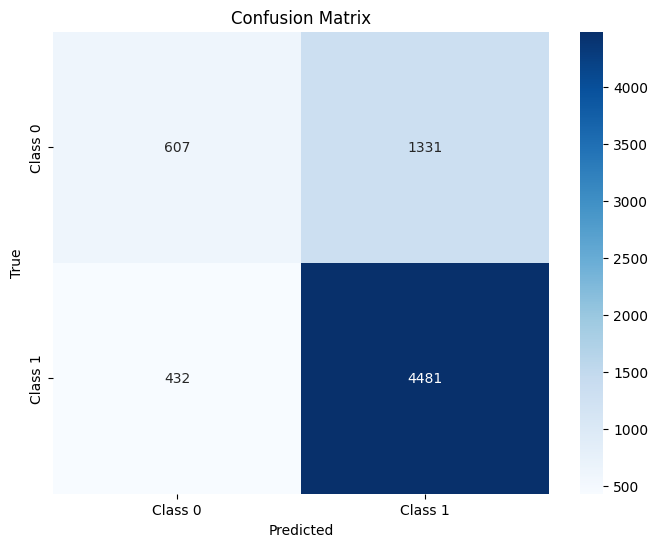

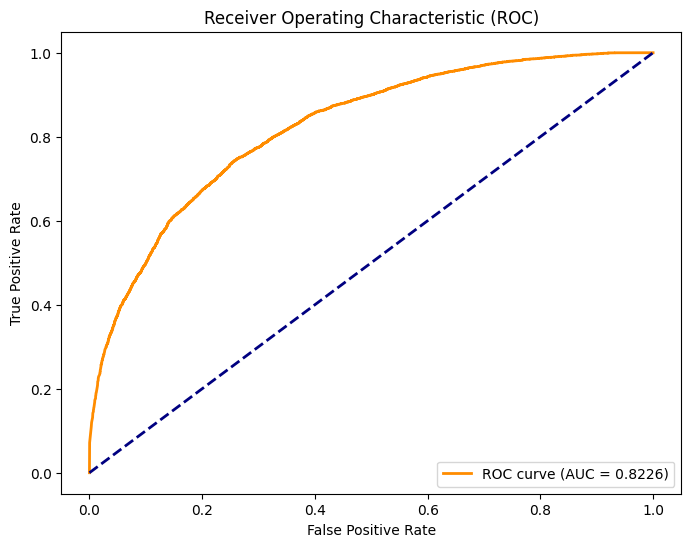

Test AUC: 0.8226
Test Accuracy: 74.27%
Test Loss: 1.2546
Test AUC: 0.8226


In [51]:
import seaborn as sns  # Import seaborn for visualization
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define the test function with visualization
def test_with_visualization(model, test_loader):
    model.eval()
    correct = 0
    all_predictions, all_targets = [], []
    possibilities = []

    test_loss = 0

    # Evaluate the model
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            test_output = model(data)
            test_loss += F.cross_entropy(test_output, target, reduction="sum").item()

            pred = test_output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

            # Store predictions and true labels
            all_predictions.extend(pred.cpu().numpy().flatten())
            all_targets.extend(target.cpu().numpy())
            
            # Store probabilities for AUC calculation
            prob = F.softmax(test_output, dim=1).cpu().numpy()
            possibilities.append(prob)

    # Convert possibilities to a single numpy array
    possibilities = np.vstack(possibilities)

    # Compute Accuracy and Loss
    accuracy = 100. * correct / len(test_loader.dataset)
    test_loss /= len(test_loader.dataset)

    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

    # Confusion Matrix Visualization
    cm = confusion_matrix(all_targets, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve and AUC Calculation
    num_classes = possibilities.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {auc_value:.4f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Test AUC: {auc_value:.4f}")

    return accuracy, test_loss, auc_value

# Example usage:
# Assuming `model` and `test_loader` are already defined and `device` is set
test_accuracy, test_loss, test_auc = test_with_visualization(model, test_loader)

# Output test results
if test_accuracy is not None:
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test AUC: {test_auc:.4f}")


In [66]:
import os

# Create the directory if it doesn't exist
save_dir = '/kaggle/working/vgg_models'
os.makedirs(save_dir, exist_ok=True)

# Save the VGG16 model weights
torch.save(model.state_dict(), os.path.join(save_dir, 'vgg16_model.pth'))



In [67]:
import zipfile

# Path to the model file
model_file = os.path.join(save_dir, 'vgg16_model.pth')

# Path for the zip file
zip_file = os.path.join(save_dir, 'vgg16_model.zip')

# Create a zip file
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_file, 'vgg16_model.pth')


resNet18

In [68]:
import torchvision.models as models

# Initialize ResNet-18 with pre-trained weights
resnet18 = models.resnet18(pretrained=True)

# Set the model to evaluation mode
resnet18.eval()

# Print the model architecture
print("ResNet-18 Architecture:")
print(resnet18)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 149MB/s]

ResNet-18 Architecture:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu

In [69]:
import torch
import torch.nn as nn
import torchvision.models as models

class CustomResNet18(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomResNet18, self).__init__()
        
        # Load pre-trained ResNet-18
        resnet18 = models.resnet18(pretrained=True)
        
        # Use all layers except the final fully connected layer
        self.features = nn.Sequential(*list(resnet18.children())[:-1])
        
        # Define a new fully connected layer for the specified number of classes
        self.fc = nn.Linear(resnet18.fc.in_features, num_classes)
    
    def forward(self, x):
        # Extract features
        x = self.features(x)
        
        # Flatten the tensor before passing to the classifier
        x = torch.flatten(x, 1)
        
        # Classifier
        x = self.fc(x)
        
        return x


In [70]:
# Instantiate the custom ResNet-18 model with 2 classes
model_resnet18 = CustomResNet18(num_classes=2)

# Print the model architecture
print("Custom ResNet-18 Architecture:")
print(model_resnet18)


Custom ResNet-18 Architecture:
CustomResNet18(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1,

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import os

**Device configuration**

In [74]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**Early Stopping**

In [76]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='/kaggle/working/models/resNet18_best.pth'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f"Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

# Define the custom ResNet18 model



**Define a custom ResNet-18 model**

In [78]:
class CustomResNet18(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomResNet18, self).__init__()
        resnet18 = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(resnet18.children())[:-1])  # Remove the last FC layer
        self.fc = nn.Linear(resnet18.fc.in_features, num_classes)  # Replace with custom FC layer

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

**Training function**

In [79]:
def train(epoch, model, num_epochs, loader, criterion, l2_decay=0.01, lr=0.001):
    learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    model.train()
    correct = 0
    for data, label in tqdm(loader, desc=f"Epoch {epoch}/{num_epochs}", unit="batch"):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(loader.dataset)
    print(f"Train Accuracy: {accuracy:.2f}%")
    return accuracy

**Validation function**

In [81]:
def validate(model, loader):
    model.eval()
    correct = 0
    all_predictions, all_targets = [], []
    possibilities = None
    test_loss = 0

    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss += F.cross_entropy(val_output, target, reduction="sum").item()
            pred = val_output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(val_output, dim=1).cpu().data.numpy()
            possibilities = prob if possibilities is None else np.concatenate((possibilities, prob), axis=0)

    accuracy = 100. * correct / len(loader.dataset)
    print(f"Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = auc(fpr, tpr)
    return accuracy, test_loss, auc_value

**Save model function**

In [82]:
def save_model(model, save_dir, model_name, current_auc, best_auc):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    model_save_path = os.path.join(save_dir, f"{model_name}_best.pth")
    if current_auc > best_auc:  # Save only if AUC improves
        best_auc = current_auc
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at: {model_save_path} with improved AUC: {best_auc:.4f}")
    else:
        print(f"No improvement in AUC: {current_auc:.4f} (Best: {best_auc:.4f})")
    return best_auc

In [83]:
def train_and_validate(model, train_loader, val_loader, num_epochs, criterion, l2_decay=0.01, lr=0.001, save_dir="/kaggle/working/models", model_name="resNet18"):
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=l2_decay)
    best_auc = 0.0  # Track the best AUC value
    best_model_path = os.path.join(save_dir, f"{model_name}_best.pth")

    for epoch in range(1, num_epochs + 1):
        # Adjust learning rate for each epoch
        learning_rate = max(lr * (0.1 ** (epoch // 10)), 1e-5)
        for param_group in optimizer.param_groups:
            param_group['lr'] = learning_rate

        print(f"Epoch {epoch}/{num_epochs}, Learning Rate: {learning_rate:.6f}")

        # Training phase
        model.train()
        train_correct = 0
        for data, label in tqdm(train_loader, desc=f"Training Epoch {epoch}", unit="batch"):
            data, label = data.to(device), label.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            pred = output.argmax(dim=1, keepdim=True)
            train_correct += pred.eq(label.view_as(pred)).sum().item()
        train_accuracy = 100. * train_correct / len(train_loader.dataset)
        print(f"Train Accuracy: {train_accuracy:.2f}%")

        # Validation phase
        val_accuracy, val_loss, current_auc = validate(model, val_loader)

        # Save the best model if AUC improves
        if current_auc > best_auc:
            best_auc = current_auc
            torch.save(model.state_dict(), best_model_path)
            print(f"New Best Model Saved with AUC: {best_auc:.4f}")

        print(f"Epoch {epoch}/{num_epochs} completed.")

    # Load the best model at the end of training
    model.load_state_dict(torch.load(best_model_path))
    print(f"Training complete. Best model loaded from {best_model_path}.")
    return model


**Training Loop**

In [84]:
model = CustomResNet18(num_classes=2).to(device)
num_epochs = 50
criterion = nn.CrossEntropyLoss()
save_dir = "/kaggle/working/models"
model_name = "resNet18"

# Train and validate the model
trained_model = train_and_validate(model, train_loader, val_loader, num_epochs, criterion, save_dir=save_dir, model_name=model_name)

Epoch 1/50, Learning Rate: 0.001000


Training Epoch 1: 100%|██████████| 639/639 [00:43<00:00, 14.83batch/s]

Train Accuracy: 89.62%


Validation Loss: 1021.7607, Accuracy: 80.24%
Confusion Matrix:
[[ 326   82]
 [ 311 1270]]
New Best Model Saved with AUC: 0.8883
Epoch 1/50 completed.
Epoch 2/50, Learning Rate: 0.001000


Training Epoch 2: 100%|██████████| 639/639 [00:42<00:00, 14.87batch/s]

Train Accuracy: 97.52%


Validation Loss: 962.4029, Accuracy: 84.06%
Confusion Matrix:
[[ 250  158]
 [ 159 1422]]
New Best Model Saved with AUC: 0.9127
Epoch 2/50 completed.
Epoch 3/50, Learning Rate: 0.001000


Training Epoch 3: 100%|██████████| 639/639 [00:42<00:00, 14.87batch/s]

Train Accuracy: 99.02%


Validation Loss: 1317.6483, Accuracy: 81.90%
Confusion Matrix:
[[ 279  129]
 [ 231 1350]]
Epoch 3/50 completed.
Epoch 4/50, Learning Rate: 0.001000


Training Epoch 4: 100%|██████████| 639/639 [00:43<00:00, 14.84batch/s]

Train Accuracy: 99.40%


Validation Loss: 1098.6446, Accuracy: 83.41%
Confusion Matrix:
[[ 279  129]
 [ 201 1380]]
New Best Model Saved with AUC: 0.9131
Epoch 4/50 completed.
Epoch 5/50, Learning Rate: 0.001000


Training Epoch 5: 100%|██████████| 639/639 [00:43<00:00, 14.85batch/s]

Train Accuracy: 99.59%


Validation Loss: 1265.0419, Accuracy: 80.54%
Confusion Matrix:
[[ 301  107]
 [ 280 1301]]
Epoch 5/50 completed.
Epoch 6/50, Learning Rate: 0.001000


Training Epoch 6: 100%|██████████| 639/639 [00:42<00:00, 14.88batch/s]

Train Accuracy: 99.75%


Validation Loss: 1281.3632, Accuracy: 81.95%
Confusion Matrix:
[[ 271  137]
 [ 222 1359]]
Epoch 6/50 completed.
Epoch 7/50, Learning Rate: 0.001000


Training Epoch 7: 100%|██████████| 639/639 [00:43<00:00, 14.83batch/s]

Train Accuracy: 99.94%


Validation Loss: 1230.9193, Accuracy: 83.71%
Confusion Matrix:
[[ 291  117]
 [ 207 1374]]
New Best Model Saved with AUC: 0.9149
Epoch 7/50 completed.
Epoch 8/50, Learning Rate: 0.001000


Training Epoch 8: 100%|██████████| 639/639 [00:43<00:00, 14.84batch/s]

Train Accuracy: 99.72%


Validation Loss: 1986.7769, Accuracy: 76.32%
Confusion Matrix:
[[ 336   72]
 [ 399 1182]]
Epoch 8/50 completed.
Epoch 9/50, Learning Rate: 0.001000


Training Epoch 9: 100%|██████████| 639/639 [00:43<00:00, 14.81batch/s]

Train Accuracy: 99.69%


Validation Loss: 1261.9907, Accuracy: 81.95%
Confusion Matrix:
[[ 288  120]
 [ 239 1342]]
Epoch 9/50 completed.
Epoch 10/50, Learning Rate: 0.000100


Training Epoch 10: 100%|██████████| 639/639 [00:43<00:00, 14.80batch/s]

Train Accuracy: 99.91%


Validation Loss: 1238.8666, Accuracy: 82.55%
Confusion Matrix:
[[ 300  108]
 [ 239 1342]]
Epoch 10/50 completed.
Epoch 11/50, Learning Rate: 0.000100


Training Epoch 11: 100%|██████████| 639/639 [00:43<00:00, 14.82batch/s]

Train Accuracy: 99.97%


Validation Loss: 1226.7991, Accuracy: 83.01%
Confusion Matrix:
[[ 311   97]
 [ 241 1340]]
Epoch 11/50 completed.
Epoch 12/50, Learning Rate: 0.000100


Training Epoch 12: 100%|██████████| 639/639 [00:43<00:00, 14.81batch/s]

Train Accuracy: 99.99%


Validation Loss: 1141.6939, Accuracy: 83.71%
Confusion Matrix:
[[ 300  108]
 [ 216 1365]]
New Best Model Saved with AUC: 0.9189
Epoch 12/50 completed.
Epoch 13/50, Learning Rate: 0.000100


Training Epoch 13: 100%|██████████| 639/639 [00:43<00:00, 14.82batch/s]

Train Accuracy: 99.98%


Validation Loss: 1129.5297, Accuracy: 83.66%
Confusion Matrix:
[[ 296  112]
 [ 213 1368]]
New Best Model Saved with AUC: 0.9206
Epoch 13/50 completed.
Epoch 14/50, Learning Rate: 0.000100


Training Epoch 14: 100%|██████████| 639/639 [00:43<00:00, 14.82batch/s]

Train Accuracy: 99.99%


Validation Loss: 1131.8501, Accuracy: 84.06%
Confusion Matrix:
[[ 308  100]
 [ 217 1364]]
Epoch 14/50 completed.
Epoch 15/50, Learning Rate: 0.000100


Training Epoch 15: 100%|██████████| 639/639 [00:43<00:00, 14.85batch/s]

Train Accuracy: 99.99%


Validation Loss: 1188.2183, Accuracy: 83.51%
Confusion Matrix:
[[ 301  107]
 [ 221 1360]]
Epoch 15/50 completed.
Epoch 16/50, Learning Rate: 0.000100


Training Epoch 16: 100%|██████████| 639/639 [00:43<00:00, 14.82batch/s]

Train Accuracy: 100.00%


Validation Loss: 1200.8419, Accuracy: 83.16%
Confusion Matrix:
[[ 315   93]
 [ 242 1339]]
Epoch 16/50 completed.
Epoch 17/50, Learning Rate: 0.000100


Training Epoch 17: 100%|██████████| 639/639 [00:43<00:00, 14.82batch/s]

Train Accuracy: 99.99%


Validation Loss: 1135.1668, Accuracy: 83.96%
Confusion Matrix:
[[ 290  118]
 [ 201 1380]]
Epoch 17/50 completed.
Epoch 18/50, Learning Rate: 0.000100


Training Epoch 18: 100%|██████████| 639/639 [00:43<00:00, 14.83batch/s]

Train Accuracy: 100.00%


Validation Loss: 1129.7428, Accuracy: 84.11%
Confusion Matrix:
[[ 289  119]
 [ 197 1384]]
Epoch 18/50 completed.
Epoch 19/50, Learning Rate: 0.000100


Training Epoch 19: 100%|██████████| 639/639 [00:43<00:00, 14.84batch/s]

Train Accuracy: 100.00%


Validation Loss: 1175.9725, Accuracy: 83.36%
Confusion Matrix:
[[ 303  105]
 [ 226 1355]]
Epoch 19/50 completed.
Epoch 20/50, Learning Rate: 0.000010


Training Epoch 20: 100%|██████████| 639/639 [00:42<00:00, 14.87batch/s]

Train Accuracy: 100.00%


Validation Loss: 1302.9959, Accuracy: 82.35%
Confusion Matrix:
[[ 320   88]
 [ 263 1318]]
Epoch 20/50 completed.
Epoch 21/50, Learning Rate: 0.000010


Training Epoch 21: 100%|██████████| 639/639 [00:43<00:00, 14.84batch/s]

Train Accuracy: 100.00%


Validation Loss: 1186.9400, Accuracy: 83.41%
Confusion Matrix:
[[ 305  103]
 [ 227 1354]]
Epoch 21/50 completed.
Epoch 22/50, Learning Rate: 0.000010


Training Epoch 22: 100%|██████████| 639/639 [00:42<00:00, 14.86batch/s]

Train Accuracy: 99.99%


Validation Loss: 1110.8038, Accuracy: 83.91%
Confusion Matrix:
[[ 295  113]
 [ 207 1374]]
New Best Model Saved with AUC: 0.9208
Epoch 22/50 completed.
Epoch 23/50, Learning Rate: 0.000010


Training Epoch 23: 100%|██████████| 639/639 [00:43<00:00, 14.84batch/s]

Train Accuracy: 100.00%


Validation Loss: 1155.8625, Accuracy: 83.51%
Confusion Matrix:
[[ 304  104]
 [ 224 1357]]
Epoch 23/50 completed.
Epoch 24/50, Learning Rate: 0.000010


Training Epoch 24: 100%|██████████| 639/639 [00:43<00:00, 14.83batch/s]

Train Accuracy: 99.99%


Validation Loss: 1133.9157, Accuracy: 83.66%
Confusion Matrix:
[[ 299  109]
 [ 216 1365]]
Epoch 24/50 completed.
Epoch 25/50, Learning Rate: 0.000010


Training Epoch 25: 100%|██████████| 639/639 [00:43<00:00, 14.86batch/s]

Train Accuracy: 100.00%


Validation Loss: 1178.8778, Accuracy: 83.56%
Confusion Matrix:
[[ 305  103]
 [ 224 1357]]
Epoch 25/50 completed.
Epoch 26/50, Learning Rate: 0.000010


Training Epoch 26: 100%|██████████| 639/639 [00:43<00:00, 14.84batch/s]

Train Accuracy: 100.00%


Validation Loss: 1178.6103, Accuracy: 83.46%
Confusion Matrix:
[[ 307  101]
 [ 228 1353]]
Epoch 26/50 completed.
Epoch 27/50, Learning Rate: 0.000010


Training Epoch 27: 100%|██████████| 639/639 [00:43<00:00, 14.85batch/s]

Train Accuracy: 100.00%


Validation Loss: 1164.3277, Accuracy: 83.61%
Confusion Matrix:
[[ 300  108]
 [ 218 1363]]
Epoch 27/50 completed.
Epoch 28/50, Learning Rate: 0.000010


Training Epoch 28: 100%|██████████| 639/639 [00:43<00:00, 14.81batch/s]

Train Accuracy: 99.99%


Validation Loss: 1144.3307, Accuracy: 83.61%
Confusion Matrix:
[[ 300  108]
 [ 218 1363]]
Epoch 28/50 completed.
Epoch 29/50, Learning Rate: 0.000010


Training Epoch 29: 100%|██████████| 639/639 [00:43<00:00, 14.82batch/s]

Train Accuracy: 100.00%


Validation Loss: 1150.5762, Accuracy: 83.61%
Confusion Matrix:
[[ 303  105]
 [ 221 1360]]
Epoch 29/50 completed.
Epoch 30/50, Learning Rate: 0.000010


Training Epoch 30: 100%|██████████| 639/639 [00:43<00:00, 14.83batch/s]

Train Accuracy: 100.00%


Validation Loss: 1056.9277, Accuracy: 83.76%
Confusion Matrix:
[[ 279  129]
 [ 194 1387]]
New Best Model Saved with AUC: 0.9272
Epoch 30/50 completed.
Epoch 31/50, Learning Rate: 0.000010


Training Epoch 31: 100%|██████████| 639/639 [00:43<00:00, 14.85batch/s]

Train Accuracy: 100.00%


Validation Loss: 1248.0292, Accuracy: 82.70%
Confusion Matrix:
[[ 311   97]
 [ 247 1334]]
Epoch 31/50 completed.
Epoch 32/50, Learning Rate: 0.000010


Training Epoch 32: 100%|██████████| 639/639 [00:43<00:00, 14.81batch/s]

Train Accuracy: 99.99%


Validation Loss: 1082.6166, Accuracy: 83.61%
Confusion Matrix:
[[ 271  137]
 [ 189 1392]]
Epoch 32/50 completed.
Epoch 33/50, Learning Rate: 0.000010


Training Epoch 33: 100%|██████████| 639/639 [00:43<00:00, 14.78batch/s]

Train Accuracy: 100.00%


Validation Loss: 1127.3736, Accuracy: 83.61%
Confusion Matrix:
[[ 298  110]
 [ 216 1365]]
Epoch 33/50 completed.
Epoch 34/50, Learning Rate: 0.000010


Training Epoch 34: 100%|██████████| 639/639 [00:43<00:00, 14.81batch/s]

Train Accuracy: 100.00%


Validation Loss: 1196.2895, Accuracy: 83.51%
Confusion Matrix:
[[ 312   96]
 [ 232 1349]]
Epoch 34/50 completed.
Epoch 35/50, Learning Rate: 0.000010


Training Epoch 35: 100%|██████████| 639/639 [00:43<00:00, 14.84batch/s]

Train Accuracy: 100.00%


Validation Loss: 1150.5530, Accuracy: 83.71%
Confusion Matrix:
[[ 306  102]
 [ 222 1359]]
Epoch 35/50 completed.
Epoch 36/50, Learning Rate: 0.000010


Training Epoch 36: 100%|██████████| 639/639 [00:43<00:00, 14.85batch/s]

Train Accuracy: 100.00%


Validation Loss: 1144.5713, Accuracy: 83.56%
Confusion Matrix:
[[ 295  113]
 [ 214 1367]]
Epoch 36/50 completed.
Epoch 37/50, Learning Rate: 0.000010


Training Epoch 37: 100%|██████████| 639/639 [00:43<00:00, 14.81batch/s]

Train Accuracy: 100.00%


Validation Loss: 1103.1500, Accuracy: 84.26%
Confusion Matrix:
[[ 297  111]
 [ 202 1379]]
Epoch 37/50 completed.
Epoch 38/50, Learning Rate: 0.000010


Training Epoch 38: 100%|██████████| 639/639 [00:43<00:00, 14.85batch/s]

Train Accuracy: 100.00%


Validation Loss: 1131.2216, Accuracy: 84.01%
Confusion Matrix:
[[ 294  114]
 [ 204 1377]]
Epoch 38/50 completed.
Epoch 39/50, Learning Rate: 0.000010


Training Epoch 39: 100%|██████████| 639/639 [00:43<00:00, 14.83batch/s]

Train Accuracy: 100.00%


Validation Loss: 1096.7341, Accuracy: 84.06%
Confusion Matrix:
[[ 290  118]
 [ 199 1382]]
Epoch 39/50 completed.
Epoch 40/50, Learning Rate: 0.000010


Training Epoch 40: 100%|██████████| 639/639 [00:43<00:00, 14.85batch/s]

Train Accuracy: 100.00%


Validation Loss: 1121.2548, Accuracy: 83.91%
Confusion Matrix:
[[ 293  115]
 [ 205 1376]]
Epoch 40/50 completed.
Epoch 41/50, Learning Rate: 0.000010


Training Epoch 41: 100%|██████████| 639/639 [00:43<00:00, 14.82batch/s]

Train Accuracy: 100.00%


Validation Loss: 1222.8056, Accuracy: 83.51%
Confusion Matrix:
[[ 309   99]
 [ 229 1352]]
Epoch 41/50 completed.
Epoch 42/50, Learning Rate: 0.000010


Training Epoch 42: 100%|██████████| 639/639 [00:43<00:00, 14.83batch/s]

Train Accuracy: 100.00%


Validation Loss: 1173.3772, Accuracy: 83.66%
Confusion Matrix:
[[ 305  103]
 [ 222 1359]]
Epoch 42/50 completed.
Epoch 43/50, Learning Rate: 0.000010


Training Epoch 43: 100%|██████████| 639/639 [00:42<00:00, 14.88batch/s]

Train Accuracy: 100.00%


Validation Loss: 1160.8188, Accuracy: 83.76%
Confusion Matrix:
[[ 298  110]
 [ 213 1368]]
Epoch 43/50 completed.
Epoch 44/50, Learning Rate: 0.000010


Training Epoch 44: 100%|██████████| 639/639 [00:43<00:00, 14.85batch/s]

Train Accuracy: 100.00%


Validation Loss: 1267.1171, Accuracy: 82.70%
Confusion Matrix:
[[ 316   92]
 [ 252 1329]]
Epoch 44/50 completed.
Epoch 45/50, Learning Rate: 0.000010


Training Epoch 45: 100%|██████████| 639/639 [00:43<00:00, 14.85batch/s]

Train Accuracy: 100.00%


Validation Loss: 1181.9927, Accuracy: 83.26%
Confusion Matrix:
[[ 302  106]
 [ 227 1354]]
Epoch 45/50 completed.
Epoch 46/50, Learning Rate: 0.000010


Training Epoch 46: 100%|██████████| 639/639 [00:43<00:00, 14.84batch/s]

Train Accuracy: 99.99%


Validation Loss: 1142.6561, Accuracy: 83.91%
Confusion Matrix:
[[ 294  114]
 [ 206 1375]]
Epoch 46/50 completed.
Epoch 47/50, Learning Rate: 0.000010


Training Epoch 47: 100%|██████████| 639/639 [00:43<00:00, 14.83batch/s]

Train Accuracy: 100.00%


Validation Loss: 1124.3410, Accuracy: 83.96%
Confusion Matrix:
[[ 294  114]
 [ 205 1376]]
Epoch 47/50 completed.
Epoch 48/50, Learning Rate: 0.000010


Training Epoch 48: 100%|██████████| 639/639 [00:42<00:00, 14.87batch/s]

Train Accuracy: 100.00%


Validation Loss: 1178.9239, Accuracy: 83.61%
Confusion Matrix:
[[ 302  106]
 [ 220 1361]]
Epoch 48/50 completed.
Epoch 49/50, Learning Rate: 0.000010


Training Epoch 49: 100%|██████████| 639/639 [00:43<00:00, 14.84batch/s]

Train Accuracy: 100.00%


Validation Loss: 1201.3536, Accuracy: 83.11%
Confusion Matrix:
[[ 306  102]
 [ 234 1347]]
Epoch 49/50 completed.
Epoch 50/50, Learning Rate: 0.000010


Training Epoch 50: 100%|██████████| 639/639 [00:43<00:00, 14.82batch/s]

Train Accuracy: 100.00%


Validation Loss: 1139.8256, Accuracy: 83.81%
Confusion Matrix:
[[ 302  106]
 [ 216 1365]]
Epoch 50/50 completed.
Training complete. Best model loaded from /kaggle/working/models/resNet18_best.pth.


/tmp/ipykernel_30/2103034583.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


**Test Function**

In [ ]:
# Test function
def test(model, test_loader):
    model.eval()
    correct = 0
    all_predictions, all_targets = [], []
    probabilities = None

    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Testing", unit="batch"):
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(output, dim=1).cpu().data.numpy()
            probabilities = prob if probabilities is None else np.concatenate((probabilities, prob), axis=0)

    # Calculate overall test accuracy
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    # ROC-AUC
    num_classes = model.fc.out_features  # Number of output classes
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), probabilities.ravel())
    auc_value = auc(fpr, tpr)
    print(f"Test ROC-AUC: {auc_value:.4f}")

    return test_accuracy, cm, auc_value

# Usage
# Assuming test_loader is defined and contains your test data
test_accuracy, test_cm, test_auc = test(model, test_loader)



Testing: 100%|██████████| 215/215 [00:07<00:00, 28.69batch/s]


Confusion Matrix:
[[ 662 1276]
 [ 482 4431]]


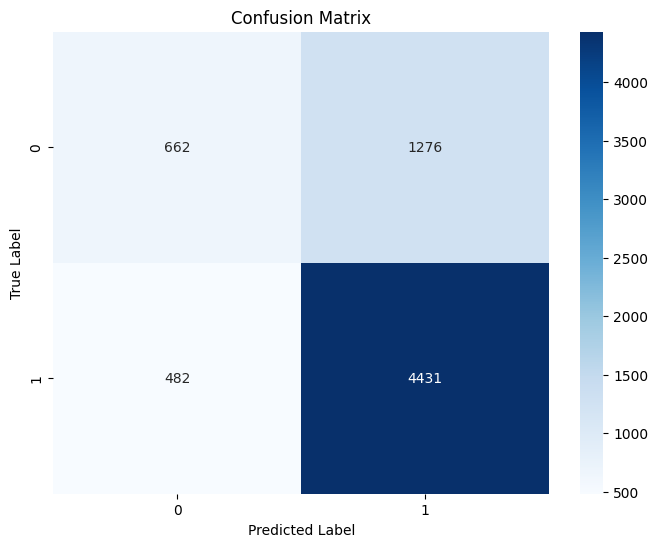

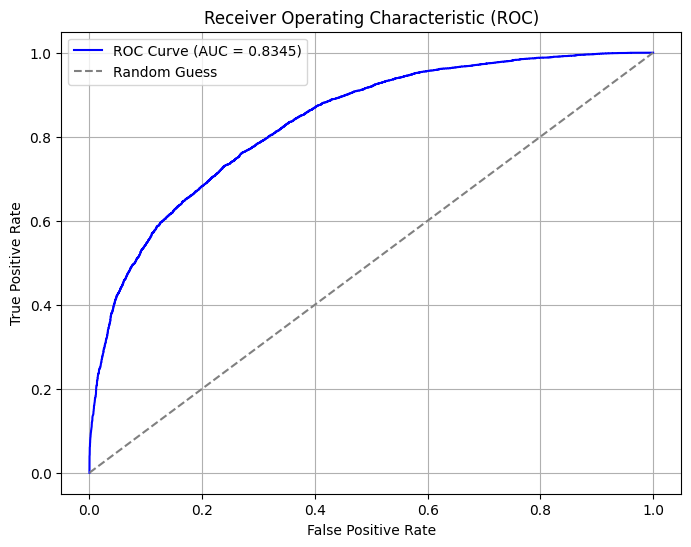

Test Accuracy: 74.34%
Test Loss: 1.1192
Test AUC: 0.8345


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Test function with visualization
def test_with_visualization(model, test_loader):
    model.eval()
    correct = 0
    test_loss = 0
    all_predictions, all_targets = [], []
    probabilities = None

    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Testing", unit="batch"):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = F.cross_entropy(output, target, reduction="sum")
            test_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(output, dim=1).cpu().data.numpy()
            probabilities = prob if probabilities is None else np.concatenate((probabilities, prob), axis=0)

    # Calculate test accuracy
    test_accuracy = 100. * correct / len(test_loader.dataset)

    # Average test loss
    test_loss /= len(test_loader.dataset)

    # Confusion Matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC-AUC
    num_classes = model.fc.out_features  # Number of output classes
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), probabilities.ravel())
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.4f})", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

    return test_accuracy, test_loss, auc_value

# Usage
# Assuming test_loader is defined
test_accuracy, test_loss, test_auc = test_with_visualization(model, test_loader)

if test_accuracy is not None:
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test AUC: {test_auc:.4f}")


In [87]:
import shutil
shutil.make_archive('/kaggle/working/resnet18_model', 'zip', '/kaggle/working/models')


'/kaggle/working/resnet18_model.zip'

In [88]:
import shutil

# Path to the model directory and the zip output
model_dir = '/kaggle/working/models'
zip_path = '/kaggle/working/resnet18_model.zip'

# Create a zip file
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', model_dir)
print(f"Model zipped at {zip_path}")


Model zipped at /kaggle/working/resnet18_model.zip


resNet50

In [91]:
import torchvision.models as models

# Initialize ResNet-50 with pre-trained weights
resnet50 = models.resnet50(pretrained=True)

# Set the model to evaluation mode
resnet50.eval()

# Print the model architecture
print("ResNet-50 Architecture:")
print(resnet50)


ResNet-50 Architecture:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_

In [92]:
class CustomResNet50(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomResNet50, self).__init__()
        
        # Load pre-trained ResNet-50
        resnet50 = models.resnet50(pretrained=True)
        
        # Use all layers except the final fully connected layer
        self.features = nn.Sequential(*list(resnet50.children())[:-1])
        
        # Define a new fully connected layer for the specified number of classes
        self.fc = nn.Linear(resnet50.fc.in_features, num_classes)
    
    def forward(self, x):
        # Extract features
        x = self.features(x)
        
        # Flatten the tensor before passing to the classifier
        x = torch.flatten(x, 1)
        
        # Classifier
        x = self.fc(x)
        
        return x


In [93]:
# Instantiate the custom ResNet-50 model with 2 classes
model_resnet50 = CustomResNet50(num_classes=2)

# Print the model architecture
print("Custom ResNet-50 Architecture:")
print(model_resnet50)


Custom ResNet-50 Architecture:
CustomResNet50(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample):

In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler  # Make sure to import the lr_scheduler module
from torchvision import models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tqdm import tqdm

In [108]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**Custom ResNet50 Model**

In [109]:
class CustomResNet50(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomResNet50, self).__init__()
        resnet50 = models.resnet50(pretrained=True)
        
        # Use all layers except the final fully connected layer
        self.features = nn.Sequential(*list(resnet50.children())[:-1])
        
        # Define a new fully connected layer for the specified number of classes
        self.fc = nn.Linear(resnet50.fc.in_features, num_classes)
    
    def forward(self, x):
        # Extract features
        x = self.features(x)
        
        # Flatten the tensor before passing to the classifier
        x = torch.flatten(x, 1)
        
        # Classifier
        x = self.fc(x)
        
        return x

In [111]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [112]:
def train(epoch, model, train_loader, criterion, optimizer):
    model.train()
    correct = 0
    for data, label in tqdm(train_loader, desc=f"Epoch {epoch}", unit="batch"):
        data, label = data.to(device), label.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()

    accuracy = 100. * correct / len(train_loader.dataset)
    print(f"Train Accuracy: {accuracy:.2f}%")
    return accuracy

In [113]:
def validate(model, val_loader, criterion):
    model.eval()
    correct = 0
    test_loss = 0
    all_predictions, all_targets = [], []
    possibilities = None

    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            val_output = model(data)
            test_loss += criterion(val_output, target).item()
            pred = val_output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = torch.nn.functional.softmax(val_output, dim=1).cpu().data.numpy()
            possibilities = prob if possibilities is None else np.concatenate((possibilities, prob), axis=0)

    accuracy = 100. * correct / len(val_loader.dataset)
    print(f"Validation Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")
    
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")
    
    # Calculate AUC
    num_classes = val_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), possibilities.ravel())
    auc_value = auc(fpr, tpr)

    print(f"Validation AUC: {auc_value:.4f}")
    return accuracy, test_loss, auc_value

**EarlyStopping class**

In [115]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='best_model.pth'):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f"Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...")
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [116]:
def configure_optimizer_and_scheduler(model):
    optimizer = optim.AdamW(model.parameters(), lr=0.001)
    scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, verbose=True)
    return optimizer, scheduler

In [117]:
num_epochs = 50
model = CustomResNet50(num_classes=2).to(device)

# Load your data
# train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
# val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer, scheduler = configure_optimizer_and_scheduler(model)
early_stopping = EarlyStopping(patience=5, verbose=True)

best_auc = 0

for epoch in range(1, num_epochs + 1):
    train_accuracy = train(epoch, model, train_loader, criterion, optimizer)
    
    val_accuracy, val_loss, current_auc = validate(model, val_loader, criterion)
    
    # Step the scheduler based on validation loss
    scheduler.step(val_loss)
    
    # Save the model with the best AUC
    if current_auc > best_auc:
        best_auc = current_auc
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"Model saved with AUC: {best_auc:.4f}")
    
    # Early stopping check
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

# Test the final model
model.load_state_dict(torch.load('best_model.pth'))
test_accuracy, test_loss, test_auc = validate(model, test_loader, criterion)
print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Test AUC: {test_auc:.4f}")

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1: 100%|██████████| 639/639 [01:54<00:00,  5.56batch/s]

Train Accuracy: 83.72%


Validation Loss: 32.5416, Accuracy: 80.29%
Confusion Matrix:
[[ 298  110]
 [ 282 1299]]
Validation AUC: 0.8754
Model saved with AUC: 0.8754
Validation loss decreased (inf --> 32.541573). Saving model...


Epoch 2: 100%|██████████| 639/639 [01:54<00:00,  5.56batch/s]

Train Accuracy: 93.41%


Validation Loss: 58.5616, Accuracy: 76.52%
Confusion Matrix:
[[ 213  195]
 [ 272 1309]]
Validation AUC: 0.8401
EarlyStopping counter: 1 out of 5


Epoch 3: 100%|██████████| 639/639 [01:54<00:00,  5.56batch/s]

Train Accuracy: 96.61%


Validation Loss: 71.3339, Accuracy: 68.98%
Confusion Matrix:
[[ 223  185]
 [ 432 1149]]
Validation AUC: 0.7681
EarlyStopping counter: 2 out of 5


Epoch 4: 100%|██████████| 639/639 [01:54<00:00,  5.56batch/s]

Train Accuracy: 97.55%


Validation Loss: 81.2941, Accuracy: 68.12%
Confusion Matrix:
[[ 273  135]
 [ 499 1082]]
Validation AUC: 0.7614
EarlyStopping counter: 3 out of 5


Epoch 5: 100%|██████████| 639/639 [01:54<00:00,  5.56batch/s]


Train Accuracy: 98.34%
Validation Loss: 80.7495, Accuracy: 73.30%
Confusion Matrix:
[[ 269  139]
 [ 392 1189]]
Validation AUC: 0.8420
EarlyStopping counter: 4 out of 5


Epoch 6: 100%|██████████| 639/639 [01:54<00:00,  5.56batch/s]

Train Accuracy: 99.63%


Validation Loss: 82.5471, Accuracy: 75.11%
Confusion Matrix:
[[ 280  128]
 [ 367 1214]]
Validation AUC: 0.8330
EarlyStopping counter: 5 out of 5
Early stopping triggered.


/tmp/ipykernel_30/724137493.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Validation Loss: 139.1887, Accuracy: 77.54%
Confusion Matrix:
[[ 916 1022]
 [ 517 4396]]
Validation AUC: 0.8549
Test Accuracy: 77.54%
Test AUC: 0.8549


**Save model function**

In [115]:
def save_model(model, save_dir, model_name, current_auc, best_auc):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    model_save_path = os.path.join(save_dir, f"{model_name}_best.pth")
    if current_auc > best_auc:  # Save only if AUC improves
        best_auc = current_auc
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved at: {model_save_path} with improved AUC: {best_auc:.4f}")
    else:
        print(f"No improvement in AUC: {current_auc:.4f} (Best: {best_auc:.4f})")
    return best_auc

**Test Function**

In [118]:
def test_with_visualization(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    all_predictions, all_targets = [], []
    probabilities = None
    test_loss = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            test_output = model(data)
            test_loss += F.cross_entropy(test_output, target, reduction="sum").item()
            pred = test_output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            all_predictions.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            prob = F.softmax(test_output, dim=1).cpu().data.numpy()
            probabilities = prob if probabilities is None else np.concatenate((probabilities, prob), axis=0)

    # Calculate metrics
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(all_targets, all_predictions)
    print(f"Confusion Matrix:\n{cm}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(set(all_targets)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

    # ROC-AUC Curve
    num_classes = test_output.shape[1]
    label_onehot = np.eye(num_classes)[np.array(all_targets).astype(int)]  # One-hot encode the true labels
    fpr, tpr, _ = roc_curve(label_onehot.ravel(), probabilities.ravel())  # Compute ROC curve
    auc_value = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, test_loss, auc_value


Test Loss: 4439.4057, Test Accuracy: 77.54%
Confusion Matrix:
[[ 916 1022]
 [ 517 4396]]


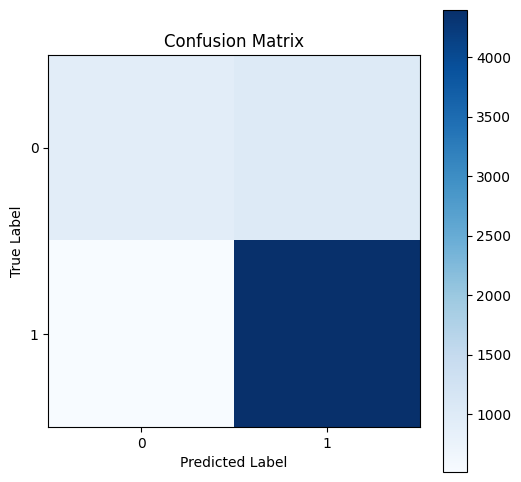

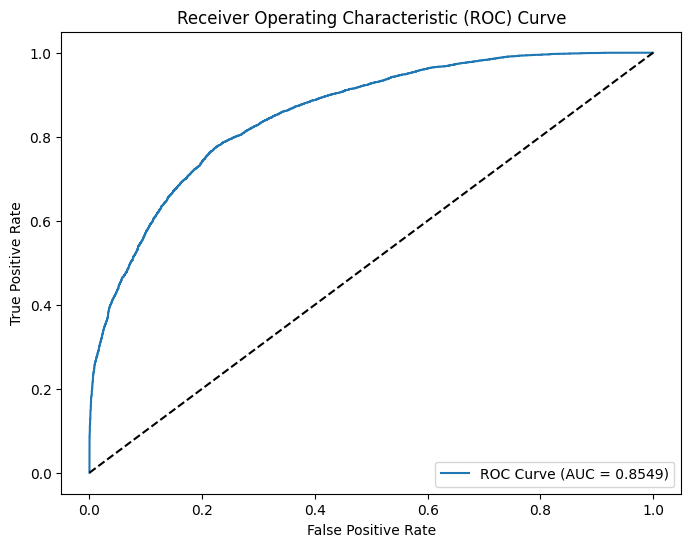

Test Accuracy: 77.54%
Test Loss: 4439.4057
Test AUC: 0.8549


In [119]:
test_accuracy, test_loss, test_auc = test_with_visualization(model, test_loader)

if test_accuracy is not None:
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test AUC: {test_auc:.4f}")



In [120]:
import os
import torch
import zipfile

# Define paths
model_path = "/kaggle/working/resnet50_model.pth"  # Model file path
zip_path = "/kaggle/working/resnet50_model.zip"   # Destination zip file path

# Save the model weights
torch.save(model.state_dict(), model_path)

# Create a ZIP file
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(model_path, arcname=os.path.basename(model_path))

print(f"Model zip created at: {zip_path}")


Model zip created at: /kaggle/working/resnet50_model.zip
